# Capstone Project 

In [3]:
import pandas as pd 
import numpy as np
import keras 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

Using TensorFlow backend.


In [4]:
#Supress warnings

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)

In [3]:
# Importing the dataset

data = pd.read_csv('XYZCorp_LendingData.txt',delimiter='\t', low_memory=False)

In [5]:
# make the copy of orignal data set

data_copy = data.copy(deep=True)

In [6]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
print(data.shape)

(855969, 73)


# Check Missing Value

In [8]:
total = data.isnull().sum().sort_values(ascending=False)
percent= (data.isnull().sum()/data.isnull().count()  * 100).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(32)

,Total,Percent
dti_joint,855529,99.948596
verification_status_joint,855527,99.948363
annual_inc_joint,855527,99.948363
il_util,844360,98.643759
mths_since_rcnt_il,843035,98.488964
total_bal_il,842681,98.447607
inq_last_12m,842681,98.447607
open_acc_6m,842681,98.447607
open_il_6m,842681,98.447607
open_il_24m,842681,98.447607


# Visualising the missing values in each column for better understanding:

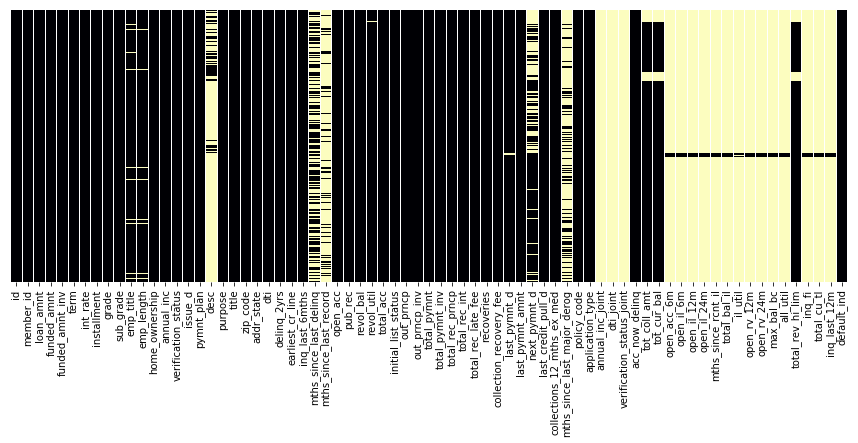

In [9]:
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar = False, yticklabels=False, cmap="magma" )

It is evident from the above heatmap that our dataset contains a lot of missing values and we can not use feature that has so many missing values.

Above heatmap shows how many values are missing in every columns. All the light colored columns represents the amount of missing values present in that specific column.

# Drop Missing Column 

In [10]:
for i in data.columns:
    if missing_data.loc[i,'Percent'] >= 50:
        data=data.drop(i,axis=1)
        

In [11]:
data.shape

(855969, 52)

# Visualising the missing values in each column after dropping the variables

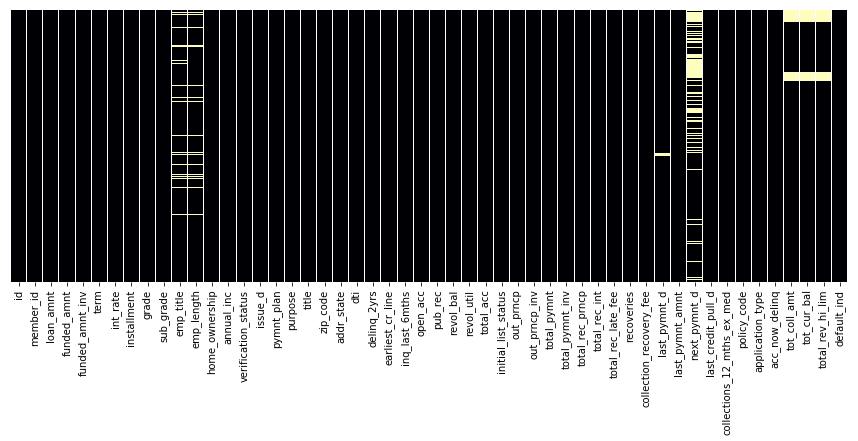

In [12]:
# Visualising the missing values in each column after dropping the variables

plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar = False, yticklabels=False, cmap="magma" )

# Duplicate records 

In [13]:
data.duplicated().value_counts()

False    855969
dtype: int64

No duplicate records found in this dataset.

# Data Types for all variables

In [18]:
print(data.dtypes)

id                              int64
member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec     

In [1]:
?sns.countplot

Object `sns.countplot` not found.


---

## Let us see how many Object type features are actually Categorical

In [14]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                        2
grade                       7
sub_grade                  35
emp_title              290912
emp_length                 11
home_ownership              6
verification_status         3
issue_d                   103
pymnt_plan                  2
purpose                    14
title                   60991
zip_code                  931
addr_state                 51
earliest_cr_line          697
initial_list_status         2
last_pymnt_d               97
next_pymnt_d                3
last_credit_pull_d        102
application_type            2
dtype: int64

# Int columns 

In [81]:
num_col=[]

for x in data.columns[:]:
    if (data[x].dtype=='int64') | (data[x].dtype=='float64'):
        num_col.append(x)

print(num_col)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind']


---

# Box Plot

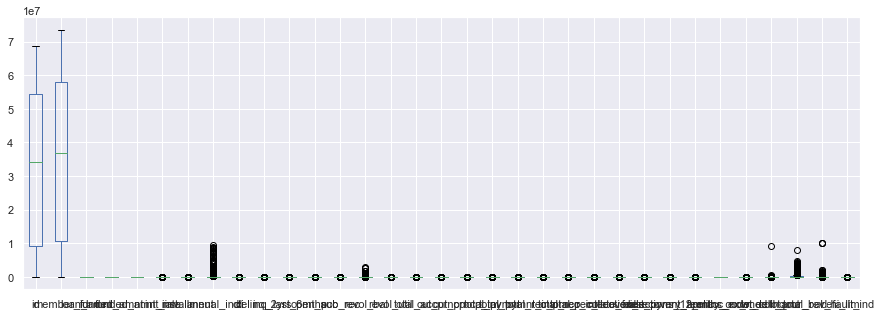

In [22]:
data.boxplot()

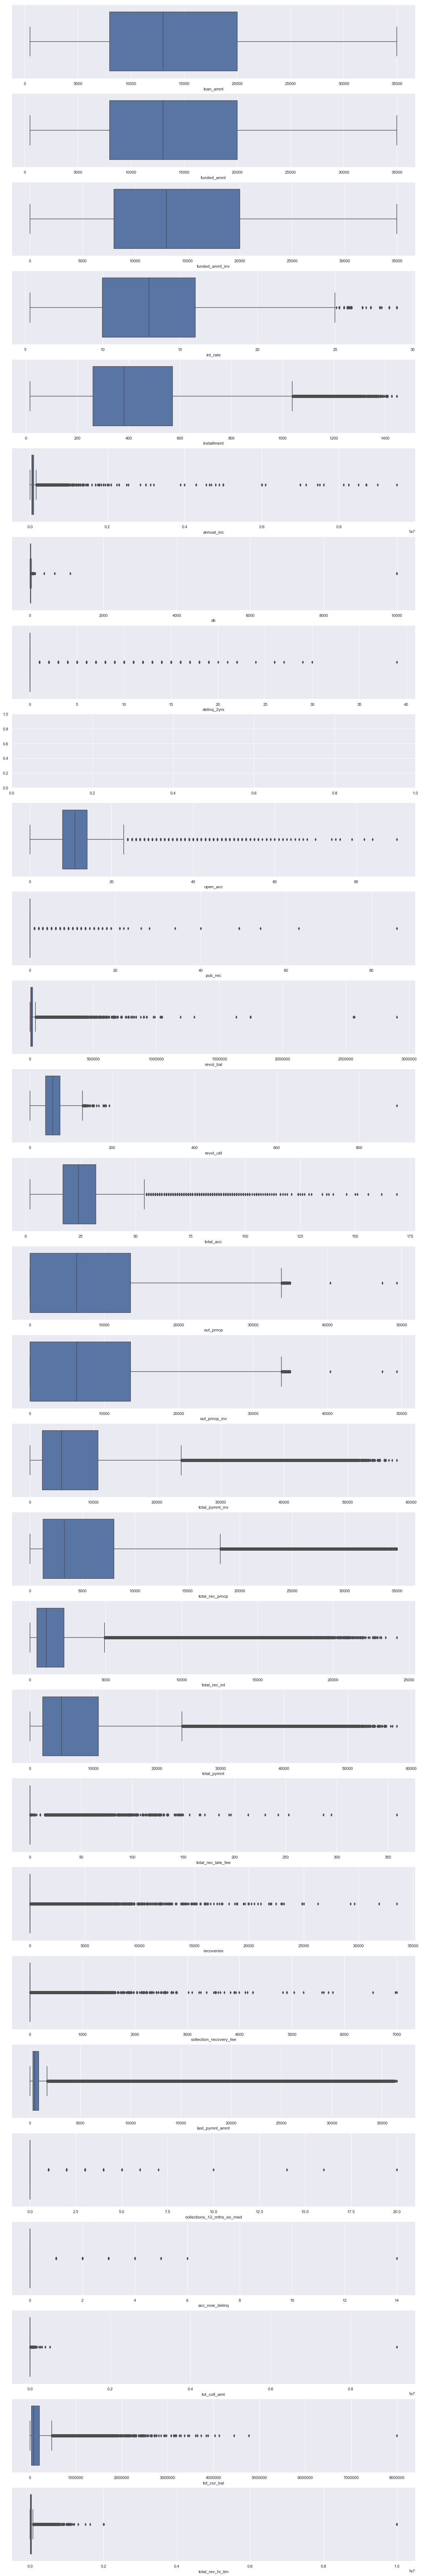

In [23]:
fig, axs = plt.subplots(29,figsize=(20,130))

plt1 = sns.boxplot(data['loan_amnt'], ax = axs[0])
plt2 = sns.boxplot(data['funded_amnt'],ax=axs[1])
plt3 = sns.boxplot(data['funded_amnt_inv'],ax=axs[2])
plt4 = sns.boxplot(data['int_rate'],ax=axs[3])
plt5 = sns.boxplot(data['installment'],ax=axs[4])
plt6 = sns.boxplot(data['annual_inc'],ax=axs[5])
plt7 = sns.boxplot(data['dti'],ax=axs[6])
plt8 = sns.boxplot(data['delinq_2yrs'],ax=axs[7])
#plt9 = sns.boxplot(data['mths_since_last_delinq'],ax=axs[8])
plt10 = sns.boxplot(data['open_acc'],ax=axs[9])
plt11 = sns.boxplot(data['pub_rec'], ax = axs[10])
plt12 = sns.boxplot(data['revol_bal'],ax=axs[11])
plt13 = sns.boxplot(data['revol_util'],ax=axs[12])
plt14 = sns.boxplot(data['total_acc'],ax=axs[13])
plt15 = sns.boxplot(data['out_prncp'],ax=axs[14])
plt16 = sns.boxplot(data['out_prncp_inv'],ax=axs[15])
plt17 = sns.boxplot(data['total_pymnt_inv'],ax=axs[16])
plt18 = sns.boxplot(data['total_rec_prncp'],ax=axs[17])
plt19 = sns.boxplot(data['total_rec_int'],ax=axs[18])
plt20 = sns.boxplot(data['total_pymnt'],ax=axs[19])
plt21 = sns.boxplot(data['total_rec_late_fee'], ax = axs[20])
plt22 = sns.boxplot(data['recoveries'],ax=axs[21])
plt23 = sns.boxplot(data['collection_recovery_fee'],ax=axs[22])
plt24 = sns.boxplot(data['last_pymnt_amnt'],ax=axs[23])
plt25 = sns.boxplot(data['collections_12_mths_ex_med'],ax=axs[24])
plt26 = sns.boxplot(data['acc_now_delinq'],ax=axs[25])
plt27 = sns.boxplot(data['tot_coll_amt'],ax=axs[26])
plt28 = sns.boxplot(data['tot_cur_bal'],ax=axs[27])
plt29 = sns.boxplot(data['total_rev_hi_lim'],ax=axs[28])



#plt.tight_layout()
plt.show()

# Data visualization

In [24]:
data['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [25]:
Non_Default = round(data['default_ind'].value_counts()[0]/len(data) * 100, 2)

Default = round(data['default_ind'].value_counts()[1]/len(data) * 100, 2)

print('Non_Default Customer : {} % of the dataset'.format(Non_Default))
print('Default Customer : {} % of the dataset'.format(Default))

Non_Default Customer : 94.57 % of the dataset
Default Customer : 5.43 % of the dataset


Text(0.5, 1.0, 'Class Distribution \n (0 : Non_Default Customer    ||    1 : Default Customer)')

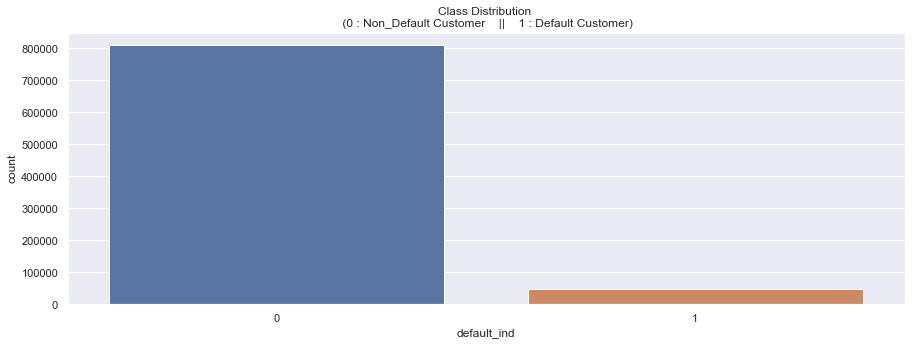

In [26]:
sns.countplot('default_ind', data=data)
plt.title('Class Distribution \n (0 : Non_Default Customer    ||    1 : Default Customer)')

---

## Terms Dist.

Text(0, 0.5, 'Count')

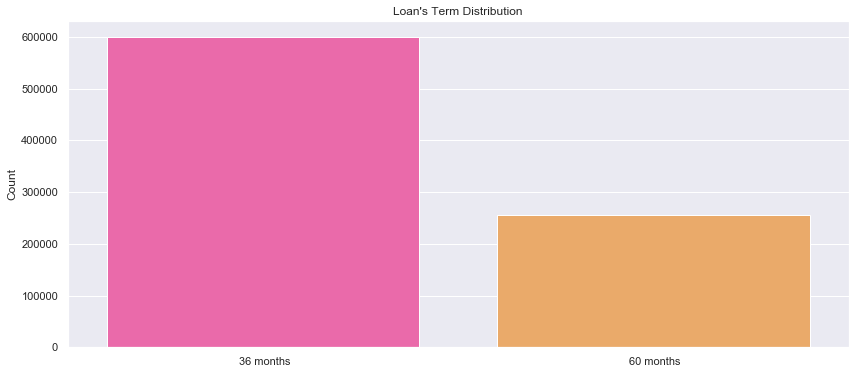

In [73]:
plt.figure(figsize=(14, 6))
sns.barplot(y=data.term.value_counts(), x=data.term.value_counts().index, palette='spring')
plt.xticks(rotation=0)
plt.title("Loan's Term Distribution")
plt.ylabel("Count")

## Amount Dist

Text(0.5, 1.0, 'Funded Amount Distribution')

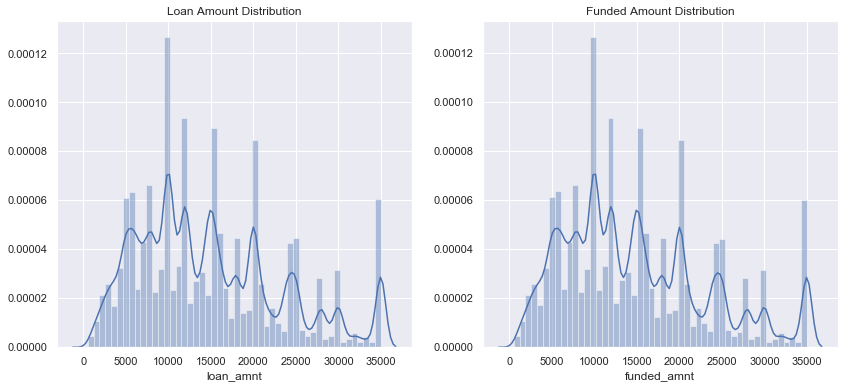

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))


sns.distplot(data['loan_amnt'], ax=ax[0])
ax[0].set_title("Loan Amount Distribution")

sns.distplot(data['funded_amnt'], ax=ax[1])
ax[1].set_title("Funded Amount Distribution")

Text(0.5, 1.0, 'Interest Rates Distribution')

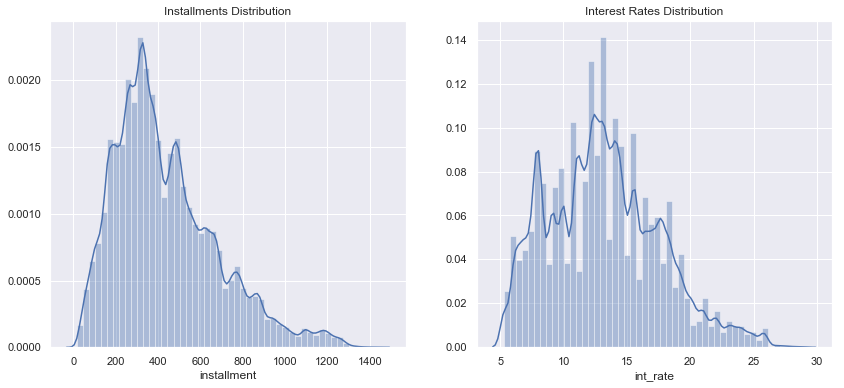

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))


sns.distplot(data['installment'], ax=ax[0])
ax[0].set_title("Installments Distribution")

sns.distplot(data['int_rate'], ax=ax[1])
ax[1].set_title("Interest Rates Distribution")

## Grade Count 

Text(0.5, 1.0, 'Grade Count')

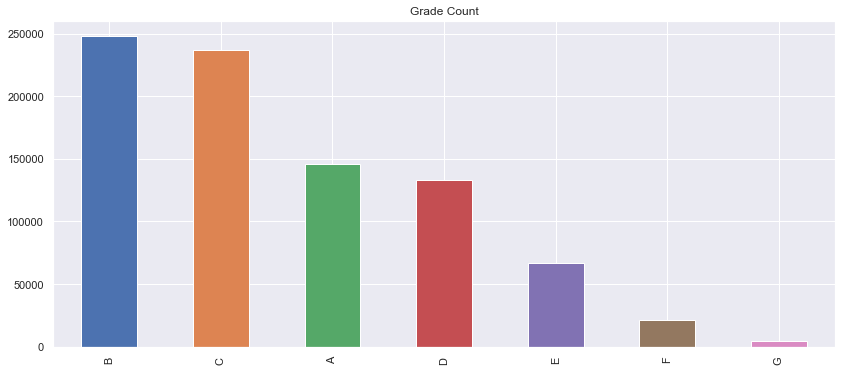

In [71]:
plt.figure(figsize=(14, 6))

data.grade.value_counts().plot(kind='bar').set_title('Grade Count')

It appears that B & C grade are the dominant ones

## Loan Purpose

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

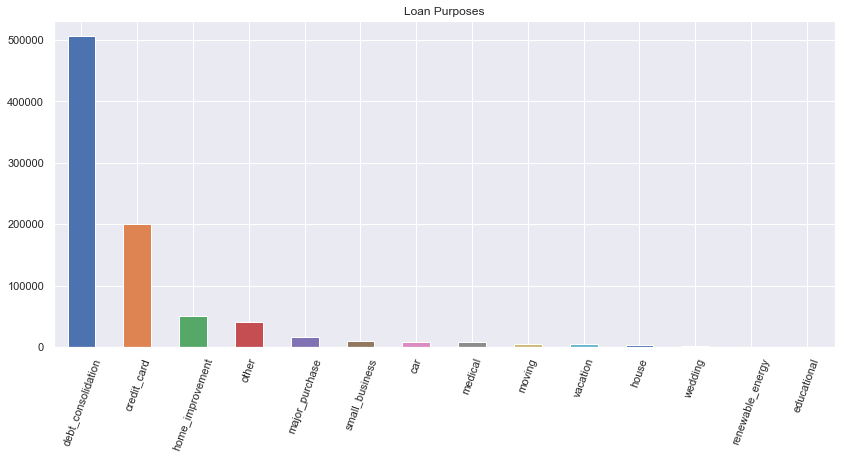

In [70]:
plt.figure(figsize=(14, 6))

data.purpose.value_counts().plot(kind='bar').set_title('Loan Purposes')
plt.xticks(rotation=70)

It appears that most of the loans are for debt_consolidation

Loan Amount Distribution BoxPlot


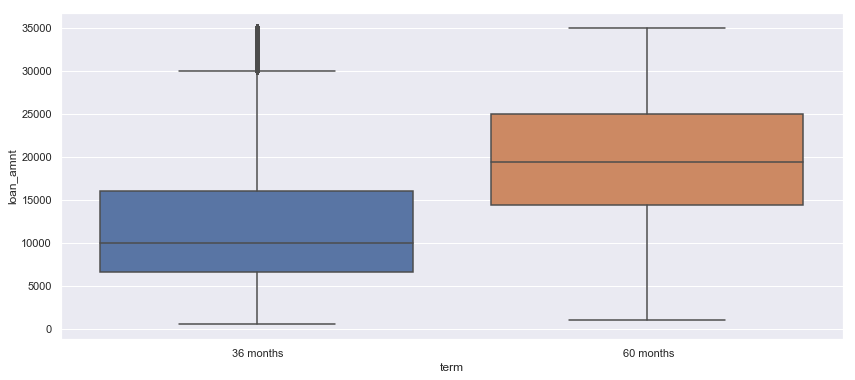

In [69]:
print("Loan Amount Distribution BoxPlot")
plt.figure(figsize=(14,6))
sns.boxplot(x=data.term, y=data.loan_amnt)

Text(0, 0.5, 'Loan Amount')

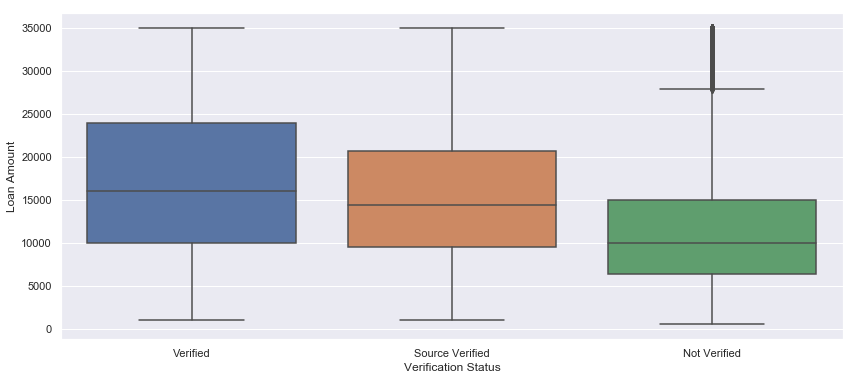

In [68]:
plt.figure(figsize=(14,6)) 

sns.boxplot(x=data.verification_status, y=data.loan_amnt)

plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")

## Loan Amount by Verification Status

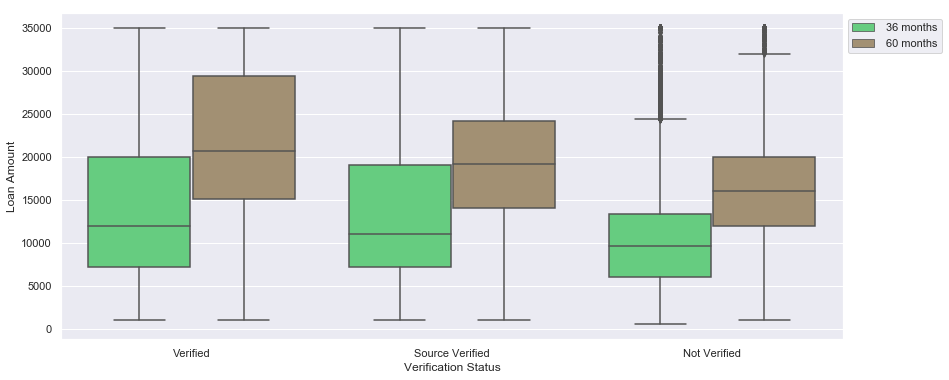

In [67]:
plt.figure(figsize=(14,6))

sns.boxplot(x=data.verification_status, y=data.loan_amnt, hue=data.term, palette="terrain")

plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)

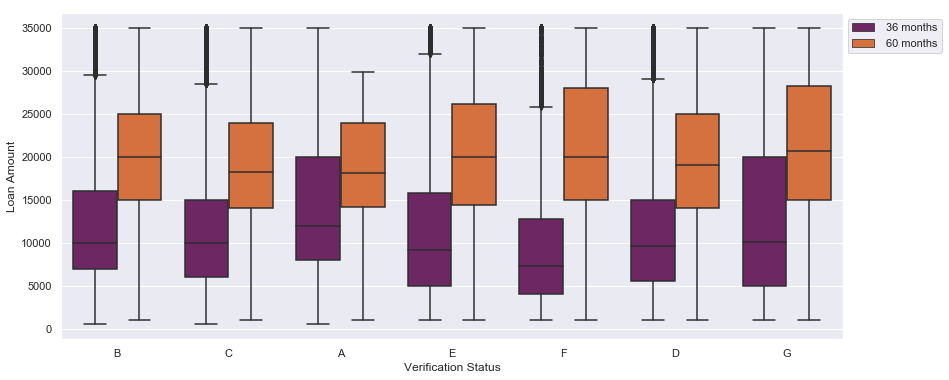

In [66]:
plt.figure(figsize=(14,6))

sns.boxplot(x=data.grade, y=data.loan_amnt, hue=data.term, palette="inferno")

plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)

## Issue_d

Create a function that will split the issue_d varibale which is nothing but the The month which the loan was funded


In [15]:

def getMonth(x):
    return x.split('-')[0]


def getYear(x):
    return x.split('-')[1]


data['Month'] = data.issue_d.apply(getMonth)
data['Year'] = data.issue_d.apply(getYear)

In [17]:
data.shape

(855969, 54)

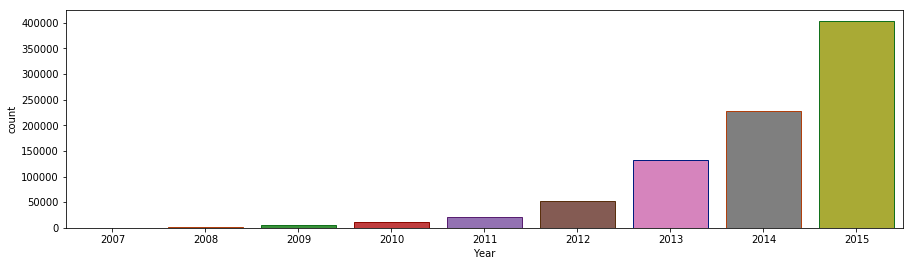

In [16]:
plt.figure(figsize=(15, 4))

sns.countplot(x="Year", data=data, edgecolor=sns.color_palette("dark", 6))

an exponential rise in the number of applications over a period of years

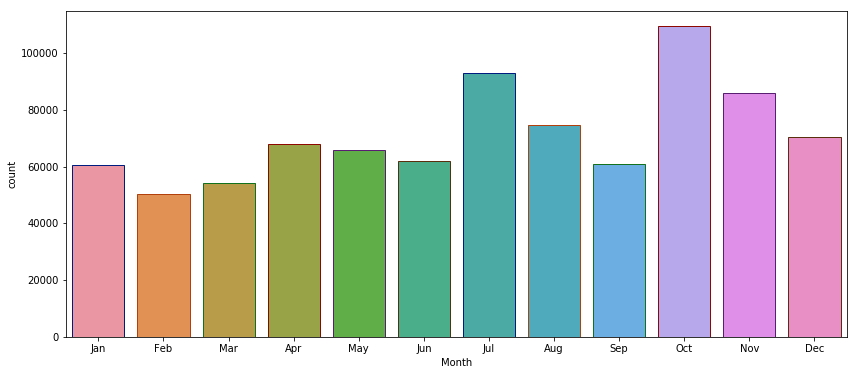

In [18]:
orderby = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(14, 6))

sns.countplot(x="Month", data=data, edgecolor=sns.color_palette("dark", 6), order=orderby)

Seems that October and July have the highest number of applications

## Loan Amount by Months

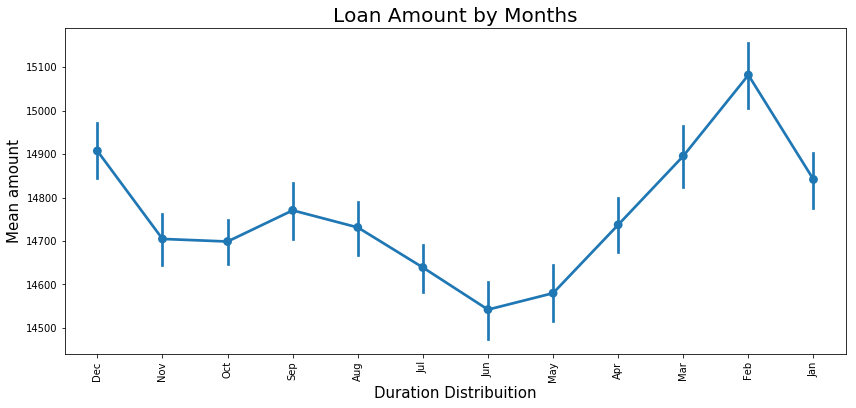

In [19]:
plt.figure(figsize = (14,6))

g = sns.pointplot(x='Month', y='loan_amnt',data=data)


g.set_xticklabels(g.get_xticklabels(),rotation=90)

g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)

g.set_title("Loan Amount by Months", fontsize=20)

plt.show()

## Loan Amount by Months and Grade

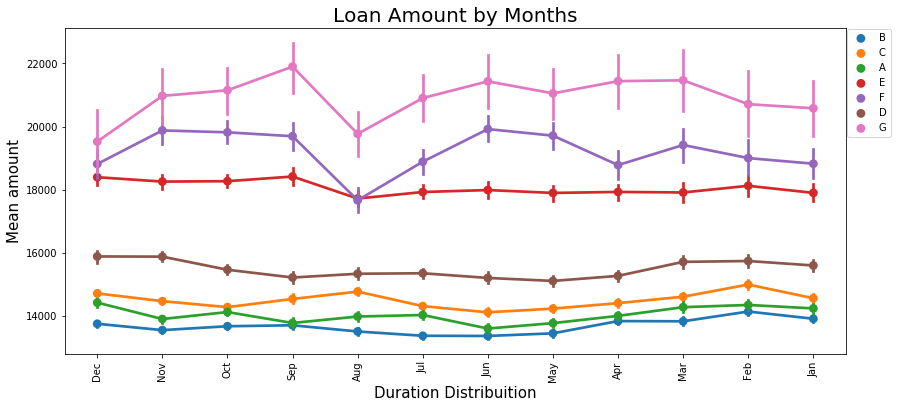

In [20]:
plt.figure(figsize = (14,6))

g = sns.pointplot(x='Month', y='loan_amnt', data=data, hue='grade')

g.set_xticklabels(g.get_xticklabels(),rotation=90)

g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)

g.set_title("Loan Amount by Months", fontsize=20)

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.10)

plt.show()

## Loan Amount by Months and term

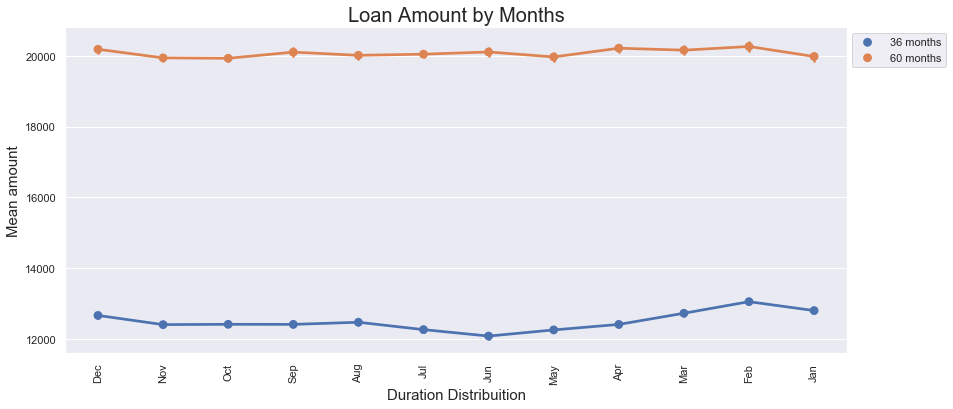

In [63]:
plt.figure(figsize = (14,6))

g = sns.pointplot(x='Month', y='loan_amnt',data=data, hue='term')

g.set_xticklabels(g.get_xticklabels(),rotation=90)

g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)

g.set_title("Loan Amount by Months", fontsize=20)

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)

plt.show()

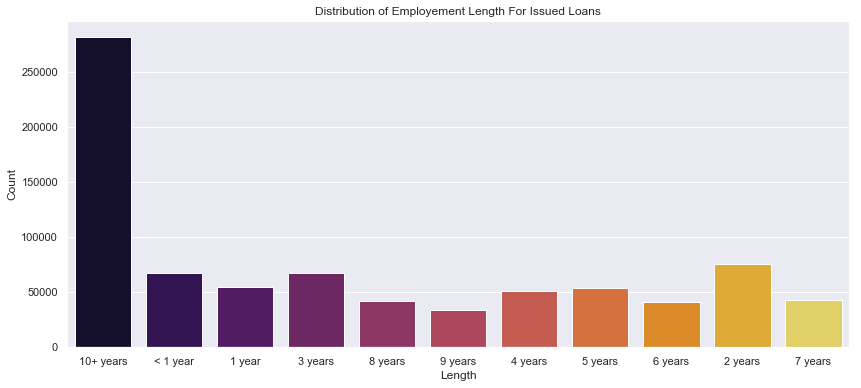

In [8]:
sns.set(rc={'figure.figsize':(14,6)})
sns.countplot(data['emp_length'],palette='inferno')
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Issued Loans")
plt.show()


Text(0, 0.5, 'Data type')

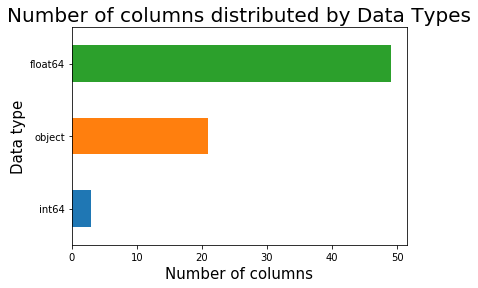

In [5]:
# Number of each type of column
data.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)



# Export level 1

In [ ]:
# data.to_csv('level_1.csv')

---

In [23]:
# Importing the dataset
data = pd.read_csv('level_1.csv',index_col=0,low_memory=False)


In [24]:
data.shape

(855969, 54)

In [25]:
data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Month,Year
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1,Dec,2011
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-2015,161.03,NaN,Sep-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-2011,n,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-2005,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.00,Jan-2016,170.08,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-2011,n,car,Car Downpayment,900xx,CA,5.35,0.0,Jan-2007,2.0,4.0,0.0,8221.0,87.5,4.0,f,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.00,Jan-2015,111.34,NaN,Dec-2014,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-2011,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,Apr-2004,2.0,11.0,0.0,5210.0,32.6,13.0,f,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,Apr-2012,152.39,NaN,Aug-2012,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1,Dec,2011
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-2011,n,other,Building my credit history.,774xx,TX,18.08,0.0,Sep-20

# Droping the Irrelevant Columns 

In [26]:
# id variable because its a unique number
data=data.drop('id',axis=1)

In [27]:
# member_id variable because its a unique number
data=data.drop('member_id',axis=1)

In [28]:
# zip_code variable because its a unique number
data=data.drop('zip_code',axis=1)

In [29]:
# policy_code variable because it has same value for all observation
data=data.drop('policy_code',axis=1)

In [30]:
# payment_plan variable because it has same value for all observation
data=data.drop('pymnt_plan',axis=1)

In [31]:
# emp_title variable because it's a categorical varibale with (290912 level)
data=data.drop('emp_title',axis=1)

In [32]:
# last_credit_pull_d variable because it's a date varibale with (102 level)
data=data.drop('last_credit_pull_d',axis=1)

In [33]:
# title variable because it's a categorical varibale with (61000 level)
data=data.drop('title',axis=1)

In [34]:
# next_pymnt_d variable because 
# it's a date varibale with (3 level) and it contains 29% Missing info.
data=data.drop('next_pymnt_d',axis=1)

In [35]:
# earliest_cr_line variable because it's a date varibale with (697 level)
data=data.drop('earliest_cr_line',axis=1)

In [36]:
# addr_state variable for trail purpose (51 level)
data=data.drop('addr_state',axis=1)

In [37]:
# last_pymnt_d variable for trail purpose (51 level)
data=data.drop('last_pymnt_d',axis=1)

In [38]:
# application_type is 'INDIVIDUAL' for 99.94% of the records
data=data.drop('application_type',axis=1)

In [39]:
# acc_now_delinq is 0 for 99.5% of the records
data=data.drop('acc_now_delinq',axis=1)

In [40]:
data.shape

(855969, 40)

# Missing Value Treatment

## With Mean

In [41]:
# tot_cur_bal


data['tot_cur_bal'].fillna(int(data['tot_cur_bal'].mean()),inplace=True)

In [42]:
# tot_coll_amt


data['tot_coll_amt'].fillna(int(data['tot_coll_amt'].mean()),inplace=True)

In [43]:
# total_rev_hi_lim


data['total_rev_hi_lim'].fillna(int(data['total_rev_hi_lim'].mean()),inplace=True)

In [44]:
# revol_utill


data['revol_util'].fillna(int(data['revol_util'].mean()),inplace=True)

## With Mode

In [45]:
data['collections_12_mths_ex_med'].value_counts()

0.0     844768
1.0      10320
2.0        709
3.0         80
4.0         22
5.0          7
6.0          2
7.0          1
16.0         1
20.0         1
14.0         1
10.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [46]:
# collections_12_mths_ex_med

data['collections_12_mths_ex_med'].fillna(data['collections_12_mths_ex_med'].mode()[0],inplace=True)

In [47]:
# emp_length

data['emp_length'].fillna(data['emp_length'].mode()[0],inplace=True)

# Check Missing Value

In [48]:
total = data.isnull().sum().sort_values(ascending=False)
percent= (data.isnull().sum()/data.isnull().count()  * 100).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(10)

,Total,Percent
Year,0,0.0
Month,0,0.0
open_acc,0,0.0
inq_last_6mths,0,0.0
delinq_2yrs,0,0.0
dti,0,0.0
purpose,0,0.0
issue_d,0,0.0
verification_status,0,0.0
annual_inc,0,0.0


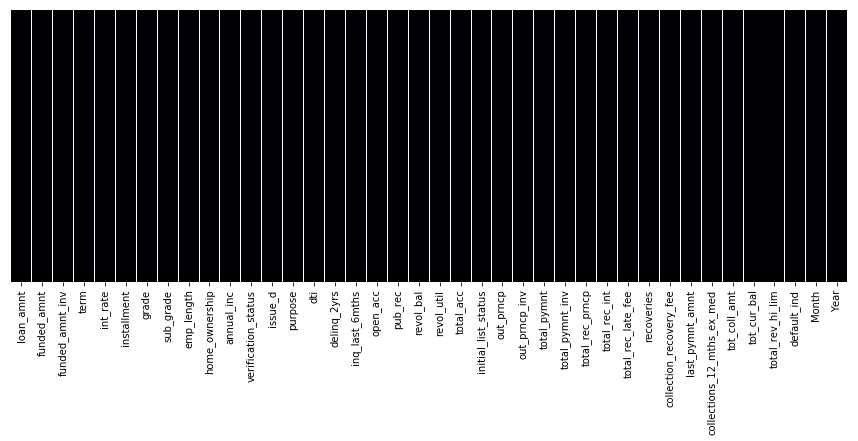

In [49]:
# Visualising the missing values in each column after dropping the variables

plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar = False, yticklabels=False, cmap="magma" )


# level 2 Export 

In [50]:
#data.to_csv('level_2.csv')

---

In [56]:
import time

In [58]:
# Importing the dataset
start = time.time()

data_copy = pd.read_csv('level_2.csv',index_col=0,low_memory = False)
#index_col=0,header=None

end = time.time()
print(end - start)

34.06245994567871


In [59]:
data.shape

(855969, 40)

 ## emp_length ( 11 level)
    
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [60]:
data['emp_length'].value_counts()

10+ years    325151
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

In [61]:
data['emp_length'] = data['emp_length'].map({'< 1 year':0, '1 year':1, '2 years':2, 
                                                 '3 years':3, '4 years':4, '5 years':5, 
                                                 '6 years':6, '7 years':7, '8 years':8,
                                                 '9 years':9, '10+ years':10})

In [62]:
data['emp_length'].value_counts()

10    325151
2      75986
0      67597
3      67392
1      54855
5      53812
4      50643
7      43204
8      42421
6      41446
9      33462
Name: emp_length, dtype: int64

In [ ]:
data['emp_length'] = data['emp_length'].map({'< 1 year':0, '1 year':1, '2 years':2, 
                                                 '3 years':3, '4 years':4, '5 years':5, 
                                                 '6 years':6, '7 years':7, '8 years':8,
                                                 '9 years':9, '10+ years':10})

data['emp_length'].value_counts()

## term (2 level)

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [67]:
data['term'].value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

In [68]:
# map function not working 
data['term'] = data['term'].replace({'36 months':1,'60 months':2},regex = True)

In [69]:
data['term'].value_counts()

1    600221
2    255748
Name: term, dtype: int64

## initial_list_status (2 level)


Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [70]:
data['initial_list_status'].value_counts()

f    442555
w    413414
Name: initial_list_status, dtype: int64

In [71]:
data['initial_list_status'] = data['initial_list_status'].map({'f':1,'w':2})

In [72]:
data['initial_list_status'].value_counts()

1    442555
2    413414
Name: initial_list_status, dtype: int64

## verification_status (3 level)

Was the income source verified


In [73]:
data['verification_status'].value_counts()

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64

In [74]:
data['verification_status'] = data['verification_status'].map({'Source Verified':1,'Verified':2, 'Not Verified':3})

In [75]:
data['verification_status'].value_counts()

1    318178
2    280049
3    257742
Name: verification_status, dtype: int64

## home_ownership (6 level)

The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [76]:
data['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

In [77]:
data['home_ownership'] = data['home_ownership'].map({'MORTGAGE':1,'RENT':2,'OWN':3,'OTHER':4,'NONE':5,'ANY':6})

In [78]:
data['home_ownership'].value_counts()

1    429106
2    342535
3     84136
4       144
5        45
6         3
Name: home_ownership, dtype: int64

## grade (7 level)

XYZ corp. assigned loan grade


In [79]:
data['grade'].value_counts()

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64

In [80]:
data['grade'] = data['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [81]:
data['grade'].value_counts()

2    247998
3    236855
1    145665
4    132802
5     66448
6     21328
7      4873
Name: grade, dtype: int64

## purpose (14 level)

A category provided by the borrower for the loan request. 


In [82]:
data['purpose'].value_counts()

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

In [83]:
data['purpose'] = data['purpose'].map({'debt_consolidation':1, 'credit_card':2, 
                                       'home_improvement':3, 'other':4, 'major_purchase':5, 
                                       'small_business':6, 'car':7, 'medical':8,
                                       'moving':9, 'vacation':10, 'house':11,'wedding':12,
                                       'renewable_energy':13,'educational':14})

In [84]:
data['purpose'].value_counts()

1     505392
2     200144
3      49956
4      40949
5      16587
6       9785
7       8593
8       8193
9       5160
10      4542
11      3513
12      2280
13       549
14       326
Name: purpose, dtype: int64

# Variable Drop

In [85]:
# sub_grade variable for trail purpose (35 level)
data=data.drop('sub_grade',axis=1)

In [86]:
data=data.drop('Month',axis=1)

In [87]:
data=data.drop( 'Year',axis=1)

In [88]:
data.shape

(855969, 37)

# Level 3 Export

In [90]:
#data.to_csv('level_3.csv')

---

In [ ]:
# Importing the dataset
data = pd.read_csv('level_3.csv',index_col=0, low_memory=False)


In [4]:
data.shape

(855969, 37)

In [5]:
data.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,5000.0,4975.0,1,10.65,162.87,2,10,2,24000.0,2,Dec-2011,2,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,1,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,225.0,139766.0,32163.0,0
1,2500.0,2500.0,2500.0,2,15.27,59.83,3,0,2,30000.0,1,Dec-2011,7,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,1,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,225.0,139766.0,32163.0,1
2,2400.0,2400.0,2400.0,1,15.96,84.33,3,10,2,12252.0,3,Dec-2011,6,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,1,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,225.0,139766.0,32163.0,0
3,10000.0,10000.0,10000.0,1,13.49,339.31,3,10,2,49200.0,1,Dec-2011,4,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,1,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,225.0,139766.0,32163.0,0
4,3000.0,3000.0,3000.0,2,12.69,67.79,2,1,2,80000.0,1,Dec-2011,4,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,1,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,225.0,139766.0,32163.0,0
5,5000.0,5000.0,5000.0,1,7.90,156.46,1,3,2,36000.0,1,Dec-2011,12,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,1,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,161.03,0.0,225.0,139766.0,32163.0,0
6,7000.0,7000.0,7000.0,2,15.96,170.08,3,8,2,47004.0,3,Dec-2011,1,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,1,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.00,170.08,0.0,225.0,139766.0,32163.0,0
7,3000.0,3000.0,3000.0,1,18.64,109.43,5,9,2,48000.0,1,Dec-2011,7,5.35,0.0,2.0,4.0,0.0,8221.0,87.5,4.0,1,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.00,111.34,0.0,225.0,139766.0,32163.0,0
8,5600.0,5600.0,5600.0,2,21.28,152.39,6,4,3,40000.0,1,Dec-2011,6,5.55,0.0,2.0,11.0,0.0,5210.0,32.6,13.0,1,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,152.39,0.0,225.0,139766.0,32163.0,1
9,5375.0,5375.0,5350.0,2,12.69,121.45,2,0,2,15000.0,2,Dec-2011,4,18.08,0.0,0.0,2.0,0.0,9279.0,36.5,3.0,1,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,121.45,0.0,225.0,139766.0,32163.0,1


# Data Partition


train  --> ( June 2007 – May 2015 )

test   -->  ( June 2015 – Dec 2015 )

So I have decided to treat the date column(‘issue_d’).First, I split the column(‘issue_d’) into two different columns and replace the values as my requirement.After that with the help of map function I joined the splited columns and make them one with different name (‘period’).
Then I sort the ‘period’ column and make it an index for slicing according to the requirement

In [6]:
data['str_split'] = data.issue_d.str.split('-')

In [7]:
data['m'] = data.str_split.str.get(0)

In [8]:
data['y']=data.str_split.str.get(1)

In [9]:
data['m'] = data['m'].replace({'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06',
                                              'Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
                                  ,regex = True)

In [10]:
data["period"] = data["y"].map(str) + data["m"]

In [11]:
data_sort = data.sort_values('period')

In [12]:
data_sort.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,str_split,m,y,period
39693,7500.0,7500.0,800.0,1,13.75,255.43,5,0,3,22000.0,3,Jun-2007,1,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,1,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,225.0,139766.0,32163.0,0,"[Jun, 2007]",06,2007,200706
39671,5000.0,5000.0,4150.0,1,7.43,155.38,1,8,1,150000.0,3,Jul-2007,3,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,1,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,225.0,139766.0,32163.0,0,"[Jul, 2007]",07,2007,200707
39659,5750.0,5750.0,3675.0,1,7.43,178.69,1,10,1,125000.0,3,Jul-2007,1,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,1,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,225.0,139766.0,32163.0,0,"[Jul, 2007]",07,2007,200707
39660,5000.0,5000.0,3975.0,1,7.43,155.38,1,6,2,40000.0,3,Jul-2007,7,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,1,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,225.0,139766.0,32163.0,0,"[Jul, 2007]",07,2007,200707
39666,1200.0,1200.0,0.0,1,11.54,39.60,3,0,2,20000.0,3,Jul-2007,2,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,1,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,225.0,139766.0,32163.0,0,"[Jul, 2007]",07,2007,200707


In [13]:
data_sort_index = data_sort.set_index('period')

In [14]:
data_sort_index.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,str_split,m,y
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200706,7500.0,7500.0,800.0,1,13.75,255.43,5,0,3,22000.0,3,Jun-2007,1,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,1,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,225.0,139766.0,32163.0,0,"[Jun, 2007]",06,2007
200707,5000.0,5000.0,4150.0,1,7.43,155.38,1,8,1,150000.0,3,Jul-2007,3,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,1,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,225.0,139766.0,32163.0,0,"[Jul, 2007]",07,2007
200707,5750.0,5750.0,3675.0,1,7.43,178.69,1,10,1,125000.0,3,Jul-2007,1,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,1,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,225.0,139766.0,32163.0,0,"[Jul, 2007]",07,2007
200707,5000.0,5000.0,3975.0,1,7.43,155.38,1,6,2,40000.0,3,Jul-2007,7,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,1,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,225.0,139766.0,32163.0,0,"[Jul, 2007]",07,2007
200707,1200.0,1200.0,0.0,1,11.54,39.60,3,0,2,20000.0,3,Jul-2007,2,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,1,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,225.0,139766.0,32163.0,0,"[Jul, 2007]",07,2007


# Droping the irrevelent columns

In [15]:
# issue_d
data_sort_index=data_sort_index.drop('issue_d',axis=1)

In [16]:
# str_split
data_sort_index=data_sort_index.drop('str_split',axis=1)

In [17]:
# m
data_sort_index=data_sort_index.drop('m',axis=1)

In [18]:
# y
data_sort_index=data_sort_index.drop('y',axis=1)

In [19]:
data_sort_index.shape

(855969, 36)

In [20]:
data_sort_index.head(15)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200706,7500.0,7500.0,800.0,1,13.75,255.43,5,0,3,22000.0,3,1,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,1,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.00000,0.0,0.0,256.59,0.0,225.0,139766.0,32163.0,0
200707,5000.0,5000.0,4150.0,1,7.43,155.38,1,8,1,150000.0,3,3,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,1,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.00000,0.0,0.0,4397.47,0.0,225.0,139766.0,32163.0,0
200707,5750.0,5750.0,3675.0,1,7.43,178.69,1,10,1,125000.0,3,1,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,1,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.00000,0.0,0.0,4.74,0.0,225.0,139766.0,32163.0,0
200707,5000.0,5000.0,3975.0,1,7.43,155.38,1,6,2,40000.0,3,7,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,1,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.00000,0.0,0.0,158.65,0.0,225.0,139766.0,32163.0,0
200707,1200.0,1200.0,0.0,1,11.54,39.60,3,0,2,20000.0,3,2,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,1,0.0,0.0,1425.37,0.00,1200.0,225.37,0.00000,0.0,0.0,39.45,0.0,225.0,139766.0,32163.0,0
200707,12250.0,12250.0,1525.0,1,10.59,398.69,3,3,2,60000.0,3,6,17.12,1.0,2.0,10.0,0.0,17214.0,8.1,24.0,1,0.0,0.0,13128.80,1634.39,12250.0,878.80,0.00000,0.0,0.0,9939.88,0.0,225.0,139766.0,32163.0,0
200707,2700.0,2700.0,550.0,1,15.96,94.88,6,1,2,52200.0,3,1,12.57,0.0,1.0,12.0,0.0,3075.0,92.3,13.0,1,0.0,0.0,3415.00,695.54,2700.0,715.00,0.00000,0.0,0.0,96.40,0.0,225.0,139766.0,32163.0,0
200707,5000.0,5000.0,1775.0,1,9.01,159.03,2,1,1,250000.0,3,4,10.00,2.0,0.0,5.0,0.0,14354.0,36.6,7.0,1,0.0,0.0,5724.82,2032.29,5000.0,724.82,0.00000,0.0,0.0,160.61,0.0,225.0,139766.0,32163.0,0
200707,3500.0,3500.0,1200.0,1,9.96,112.87,2,0,2,13500.0,3,14,16.44,0.0,1.0,10.0,0.0,2864.0,41.1,16.0,1,0.0,0.0,3941.83,1351.44,3500.0,441.83,0.00000,0.0,0.0,1798.54,0.0,225.0,139766.0,32163.0,0


# Level 4 Export

In [21]:
data_sort_index.to_csv('level_4.csv')

---

In [ ]:
# Importing the dataset
data = pd.read_csv('level_4.csv',index_col=0,low_memory=False)


In [62]:
data.shape

(855969, 36)

# As per the requirement i have sliced the data in train and test.

# Train

In [63]:
train_data = data.loc['200706':'201505',:]

In [64]:
train_data.shape

(598978, 36)

In [65]:
train_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200706,7500.0,7500.0,800.0,1,13.75,255.43,5,0,3,22000.0,3,1,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,1,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,225.0,139766.0,32163.0,0
200707,5000.0,5000.0,4150.0,1,7.43,155.38,1,8,1,150000.0,3,3,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,1,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,225.0,139766.0,32163.0,0
200707,5750.0,5750.0,3675.0,1,7.43,178.69,1,10,1,125000.0,3,1,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,1,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,225.0,139766.0,32163.0,0
200707,5000.0,5000.0,3975.0,1,7.43,155.38,1,6,2,40000.0,3,7,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,1,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,225.0,139766.0,32163.0,0
200707,1200.0,1200.0,0.0,1,11.54,39.60,3,0,2,20000.0,3,2,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,1,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,225.0,139766.0,32163.0,0


In [66]:
train_data.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505,8800.0,8800.0,8800.0,1,10.99,288.06,2,10,1,20000.0,2,1,4.44,1.0,0.0,6.0,0.0,2309.0,19.7,16.0,1,7086.08,7086.08,2293.73,2293.73,1713.92,579.81,0.0,0.0,0.0,288.06,0.0,0.0,72575.0,11700.0,0
201505,12000.0,12000.0,12000.0,1,6.39,367.19,1,8,1,69000.0,3,1,16.78,0.0,0.0,9.0,0.0,3560.0,9.5,17.0,1,9527.97,9527.97,2933.26,2933.26,2472.03,461.23,0.0,0.0,0.0,367.19,0.0,0.0,129286.0,37500.0,0
201505,16000.0,16000.0,16000.0,1,6.92,493.45,1,5,1,165000.0,3,1,12.83,0.0,0.0,24.0,0.0,24827.0,28.3,43.0,1,12725.00,12725.00,3941.45,3941.45,3275.00,666.45,0.0,0.0,0.0,493.45,0.0,321.0,236729.0,87800.0,0
201505,10000.0,10000.0,10000.0,1,6.92,308.41,1,5,1,45000.0,3,3,27.95,0.0,1.0,7.0,1.0,527.0,8.5,28.0,2,7953.10,7953.10,2459.59,2459.59,2046.90,412.69,0.0,0.0,0.0,308.41,0.0,0.0,134074.0,6200.0,0
201505,5000.0,5000.0,5000.0,1,6.92,154.21,1,10,1,20000.0,3,2,26.35,0.0,1.0,10.0,1.0,6223.0,38.9,37.0,2,0.00,0.00,5129.80,5129.80,5000.00,129.80,0.0,0.0,0.0,4669.09,0.0,0.0,129224.0,16000.0,0


# Test

In [67]:
test_data = data.loc['201506':'201512',:]

In [68]:
test_data.shape

(256991, 36)

In [69]:
test_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201506,35000.0,35000.0,35000.0,1,9.17,1115.77,2,1,1,130000.0,2,1,26.59,0.0,0.0,25.0,0.0,45846.0,65.0,44.0,2,28923.94,28923.94,7792.56,7792.56,6076.06,1716.50,0.0,0.0,0.0,1115.77,0.0,0.0,227294.0,70500.0,0
201506,11500.0,11500.0,11475.0,2,9.17,239.68,2,10,2,74000.0,1,1,23.61,0.0,0.0,7.0,0.0,20480.0,61.1,11.0,2,10571.62,10548.63,1432.22,1429.11,928.38,503.84,0.0,0.0,0.0,239.68,0.0,0.0,56802.0,33500.0,0
201506,12000.0,12000.0,12000.0,2,15.61,289.34,4,2,2,48000.0,1,1,31.40,0.0,1.0,9.0,0.0,15264.0,74.8,23.0,2,11174.11,11174.11,1725.63,1725.63,825.89,899.74,0.0,0.0,0.0,289.34,0.0,0.0,60872.0,20400.0,0
201506,35000.0,35000.0,35000.0,1,12.29,1167.36,3,3,1,121000.0,2,1,22.18,3.0,0.0,10.0,0.0,27999.0,76.9,35.0,2,29160.72,29160.72,8167.03,8167.03,5839.28,2327.75,0.0,0.0,0.0,1167.36,0.0,0.0,277104.0,36400.0,0
201506,27000.0,27000.0,27000.0,2,8.18,549.80,2,10,1,100000.0,1,2,18.73,0.0,0.0,16.0,0.0,28486.0,61.0,39.0,2,24386.79,24386.79,3824.06,3824.06,2613.21,1210.85,0.0,0.0,0.0,549.80,0.0,0.0,209664.0,46700.0,0


In [70]:
test_data.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201512,14400.0,14400.0,14400.0,1,11.99,478.22,3,8,2,57000.0,2,1,22.15,0.0,0.0,9.0,0.0,9751.0,75.0,13.0,1,14065.66,14065.66,459.04,459.04,334.34,124.70,0.0,0.0,0.0,478.22,0.0,0.0,35418.0,13000.0,0
201512,20000.0,20000.0,20000.0,1,5.32,602.30,1,10,1,99000.0,3,2,12.61,0.0,0.0,11.0,0.0,18184.0,33.4,19.0,2,19486.37,19486.37,596.39,596.39,513.63,82.76,0.0,0.0,0.0,602.30,0.0,0.0,35828.0,54400.0,0
201512,12000.0,12000.0,12000.0,2,13.67,277.18,3,9,2,40000.0,2,1,30.30,0.0,1.0,10.0,0.0,12113.0,57.7,20.0,2,11859.52,11859.52,268.07,268.07,140.48,127.59,0.0,0.0,0.0,277.18,0.0,0.0,66850.0,21000.0,0
201512,35000.0,35000.0,35000.0,1,11.22,1149.51,2,2,2,120000.0,1,3,2.82,0.0,0.0,11.0,0.0,4801.0,18.6,22.0,2,34177.74,34177.74,1127.69,1127.69,822.26,305.43,0.0,0.0,0.0,1149.51,0.0,0.0,9224.0,25800.0,0
201512,34500.0,34500.0,34500.0,2,15.41,828.20,4,2,2,76000.0,1,1,25.92,0.0,0.0,18.0,0.0,44978.0,75.1,47.0,2,34114.84,34114.84,798.66,798.66,385.16,413.50,0.0,0.0,0.0,828.20,0.0,0.0,47896.0,59900.0,0


# Export train data and test data 

In [14]:
#train_data.to_csv('train_data.csv')
#test_data.to_csv('test_data.csv')

In [15]:
train_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [71]:
x_cols=[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim']]

y_cols = [['default_ind']]


# Seprate featrues and labels 

# Train

In [30]:
#x_train=train_data.iloc[:,:-1]


In [72]:
x_train = pd.DataFrame(train_data.values[:,:-1],columns=x_cols)
# x_train = train_data.iloc[:,:-1]

In [73]:
x_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,7500.0,7500.0,800.0,1.0,13.75,255.43,5.0,0.0,3.0,22000.0,3.0,1.0,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,1.0,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,225.0,139766.0,32163.0
1,5000.0,5000.0,4150.0,1.0,7.43,155.38,1.0,8.0,1.0,150000.0,3.0,3.0,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,1.0,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,225.0,139766.0,32163.0
2,5750.0,5750.0,3675.0,1.0,7.43,178.69,1.0,10.0,1.0,125000.0,3.0,1.0,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,1.0,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,225.0,139766.0,32163.0
3,5000.0,5000.0,3975.0,1.0,7.43,155.38,1.0,6.0,2.0,40000.0,3.0,7.0,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,1.0,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,225.0,139766.0,32163.0
4,1200.0,1200.0,0.0,1.0,11.54,39.60,3.0,0.0,2.0,20000.0,3.0,2.0,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,1.0,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,225.0,139766.0,32163.0


In [74]:
y_train = pd.DataFrame(train_data.values[:,-1],columns=y_cols)

#y_train = train_data.iloc[:,-1]

In [75]:
y_train.head()
# type(y_train) pandas.core.series.Series

,default_ind
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


# Test

In [76]:
x_test = pd.DataFrame(test_data.values[:,:-1],columns=x_cols)
#x_test = test_data.iloc[:,:-1]

In [77]:
x_test.head()
# type(x_test) pandas.core.frame.DataFrame

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,35000.0,35000.0,35000.0,1.0,9.17,1115.77,2.0,1.0,1.0,130000.0,2.0,1.0,26.59,0.0,0.0,25.0,0.0,45846.0,65.0,44.0,2.0,28923.94,28923.94,7792.56,7792.56,6076.06,1716.50,0.0,0.0,0.0,1115.77,0.0,0.0,227294.0,70500.0
1,11500.0,11500.0,11475.0,2.0,9.17,239.68,2.0,10.0,2.0,74000.0,1.0,1.0,23.61,0.0,0.0,7.0,0.0,20480.0,61.1,11.0,2.0,10571.62,10548.63,1432.22,1429.11,928.38,503.84,0.0,0.0,0.0,239.68,0.0,0.0,56802.0,33500.0
2,12000.0,12000.0,12000.0,2.0,15.61,289.34,4.0,2.0,2.0,48000.0,1.0,1.0,31.40,0.0,1.0,9.0,0.0,15264.0,74.8,23.0,2.0,11174.11,11174.11,1725.63,1725.63,825.89,899.74,0.0,0.0,0.0,289.34,0.0,0.0,60872.0,20400.0
3,35000.0,35000.0,35000.0,1.0,12.29,1167.36,3.0,3.0,1.0,121000.0,2.0,1.0,22.18,3.0,0.0,10.0,0.0,27999.0,76.9,35.0,2.0,29160.72,29160.72,8167.03,8167.03,5839.28,2327.75,0.0,0.0,0.0,1167.36,0.0,0.0,277104.0,36400.0
4,27000.0,27000.0,27000.0,2.0,8.18,549.80,2.0,10.0,1.0,100000.0,1.0,2.0,18.73,0.0,0.0,16.0,0.0,28486.0,61.0,39.0,2.0,24386.79,24386.79,3824.06,3824.06,2613.21,1210.85,0.0,0.0,0.0,549.80,0.0,0.0,209664.0,46700.0


In [78]:
y_test = pd.DataFrame(test_data.values[:,-1],columns=y_cols)
#y_test = test_data.iloc[:,-1]

In [79]:
y_test.head()
# type(y_test) pandas.core.series.Series

,default_ind
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [80]:
type(y_test)

pandas.core.frame.DataFrame


# Feature Scaling 

In [54]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_scale = pd.DataFrame(sc.fit_transform(x_train),columns=x_cols)
x_test_scale = pd.DataFrame(sc.transform(x_test),columns=x_cols)

In [55]:
x_train_scale.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,-0.844559,-0.843203,-1.640620,-0.634014,0.052412,-0.737495,1.682281,-1.698028,2.149639,-0.915633,1.286434,-0.521055,-0.414882,0.848153,-0.730864,-0.847976,-0.32479,-0.589107,-0.183001,-1.470150,-0.809528,-0.811282,-0.811236,-0.108522,-1.121129,-0.033334,-0.255238,-0.103534,-0.136873,-0.094862,-0.474069,-0.09384,0.001194,0.00479,0.02725
1,-1.144446,-1.143412,-1.238829,-0.634014,-1.393496,-1.149406,-1.365338,0.492187,-0.900245,1.339413,1.286434,0.567029,-2.185476,-0.358617,-0.730864,-1.821052,-0.32479,-0.499397,-1.532957,-0.531397,-0.809528,-0.811282,-0.811236,-0.605437,-0.710525,-0.394434,-0.924911,-0.103534,-0.136873,-0.094862,0.292991,-0.09384,0.001194,0.00479,0.02725
2,-1.054480,-1.053349,-1.295800,-0.634014,-1.393496,-1.053437,-1.365338,1.039741,-0.900245,0.898974,1.286434,-0.521055,-2.152022,-0.358617,-0.730864,-0.264131,-0.32479,-0.653977,-1.925287,-0.787420,-0.809528,-0.811282,-0.811236,-0.451285,-0.734114,-0.286104,-0.705917,-0.103534,-0.136873,-0.094862,-0.520722,-0.09384,0.001194,0.00479,0.02725
3,-1.144446,-1.143412,-1.259819,-0.634014,-1.393496,-1.149406,-1.365338,-0.055367,0.624697,-0.598518,1.286434,2.743197,-1.869520,-0.358617,1.268148,-1.431822,-0.32479,-0.666158,-1.764980,-1.555491,-0.809528,-0.811282,-0.811236,-0.553627,-0.691671,-0.394434,-0.740312,-0.103534,-0.136873,-0.094862,-0.492212,-0.09384,0.001194,0.00479,0.02725
4,-1.600275,-1.599730,-1.736569,-0.634014,-0.453198,-1.626078,0.158472,-1.698028,0.624697,-0.950869,1.286434,0.022987,-1.932711,-0.358617,1.268148,-1.626437,-0.32479,-0.733464,0.842122,-1.811515,-0.809528,-0.811282,-0.811236,-1.068736,-1.242635,-0.943307,-0.902366,-0.103534,-0.136873,-0.094862,-0.514292,-0.09384,0.001194,0.00479,0.02725
5,-0.274774,-0.272805,-1.553665,-0.634014,-0.670542,-0.147687,0.158472,-0.876698,0.624697,-0.246167,1.286434,2.199155,-0.064233,0.848153,1.268148,-0.264131,-0.32479,0.033752,-2.013878,-0.104691,-0.809528,-0.811282,-0.811236,0.377643,-1.040129,0.652757,-0.614634,-0.103534,-0.136873,-0.094862,1.319672,-0.09384,0.001194,0.00479,0.02725
6,-1.420343,-1.419605,-1.670604,-0.634014,0.558022,-1.398487,2.444186,-1.424251,0.624697,-0.383583,1.286434,-0.521055,-0.627998,-0.358617,0.268642,0.125099,-0.32479,-0.641652,1.538193,-1.043444,-0.809528,-0.811282,-0.811236,-0.822845,-1.156455,-0.726647,-0.686762,-0.103534,-0.136873,-0.094862,-0.503743,-0.09384,0.001194,0.00479,0.02725
7,-1.144446,-1.143412,-1.523681,-0.634014,-1.032019,-1.134379,-0.603433,-1.424251,-0.900245,3.101168,1.286434,1.111071,-0.946432,2.054923,-0.730864,-1.237207,-0.32479,-0.102867,-0.811574,-1.555491,-0.809528,-0.811282,-0.811236,-0.537384,-0.990828,-0.394434,-0.682438,-0.103534,-0.136873,-0.094862,-0.491849,-0.09384,0.001194,0.00479,0.02725
8,-1.324379,-1.323538,-1.592645,-0.634014,-0.814675,-1.324421,-0.603433,-1.698028,0.624697,-1.065383,1.286434,6.551492,-0.148488,-0.358617,0.268642,-0.264131,-0.32479,-0.651732,-0.621736,-0.787420,-0.809528,-0.811282,-0.811236,-0.757737,-1.075187,-0.611095,-0.807050,-0.103534,-0.136873,-0.094862,-0.188437,-0.09384,0.001194,0.00479,0.02725
9,-1.144446,-1.143412,-1.364764,-0.634014,-1.393496,-1.149406,-1.365338,0.218410,-0.900245,0.370448,1.286434,4.375324,-1.710922,-0.358617,-0.730864,-0.653361,-0.32479,-0.613708,-2.068720,-0.787420,-0.809528,-0.811282,-0.811236,-0.553621,-0.812943,-0.394434,-0.740290,-0.103534,-0.136873,-0.094862,-0.492447,-0.09384,0.001194,0.00479,0.02725


In [56]:
x_test_scale.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,2.454199,2.459100,2.461237,-0.634014,-0.995414,2.804565,-0.603433,-1.424251,-0.900245,0.987062,0.053295,-0.521055,1.109142,-0.358617,-0.730864,2.655096,-0.32479,1.401471,0.386512,1.602133,1.235288,3.134612,3.135597,-0.281841,-0.277114,-0.239008,-0.245762,-0.103534,-0.136873,-0.094862,-0.314914,-0.09384,-0.017634,0.613777,1.145613
1,-0.364740,-0.362868,-0.360289,1.577252,-0.995414,-0.802339,-0.603433,1.039741,0.624697,0.000479,-1.179845,-0.521055,0.739907,-0.358617,-0.730864,-0.847976,-0.32479,0.189765,0.221986,-1.214126,1.235288,0.630931,0.628184,-1.067889,-1.065564,-0.982540,-0.779744,-0.103534,-0.136873,-0.094862,-0.477202,-0.09384,-0.017634,-0.572443,0.066253
2,-0.304762,-0.302826,-0.297322,1.577252,0.477948,-0.597886,0.920377,-1.150474,0.624697,-0.457577,-1.179845,-0.521055,1.705122,-0.358617,0.268642,-0.458746,-0.32479,-0.059397,0.799936,-0.190032,1.235288,0.713125,0.713534,-1.031628,-1.028824,-0.997344,-0.605414,-0.103534,-0.136873,-0.094862,-0.468002,-0.09384,-0.017634,-0.544126,-0.315899
3,2.454199,2.459100,2.461237,-0.634014,-0.281611,3.016964,0.158472,-0.876698,-0.900245,0.828504,0.053295,-0.521055,0.562723,3.261693,-0.730864,-0.264131,-0.32479,0.548940,0.888527,0.834062,1.235288,3.166914,3.167907,-0.235562,-0.230716,-0.273209,0.023396,-0.103534,-0.136873,-0.094862,-0.305357,-0.09384,-0.017634,0.960337,0.150851
4,1.494560,1.498430,1.501738,1.577252,-1.221909,0.474440,-0.603433,1.039741,-0.900245,0.458536,-1.179845,0.022987,0.135253,-0.358617,-0.730864,0.903560,-0.32479,0.572203,0.217768,1.175427,1.235288,2.515640,2.516478,-0.772291,-0.768823,-0.739183,-0.468419,-0.103534,-0.136873,-0.094862,-0.419755,-0.09384,-0.017634,0.491114,0.451322


# Export all files 

In [57]:
x_train.to_csv('x_train.csv')
x_test.to_csv('x_test.csv')
x_train_scale.to_csv('x_train_scale.csv')
x_test_scale.to_csv('x_test_scale.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

# Model Building

# Custom function for Confusion matrix

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools


def plot_confusion_metrix(cm,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """this function prints and plot the confusion matirx
    Normalization can be applied by setting 'normalize=True'
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## Logistic Regression 

In [5]:
# lOADING TRAINING AND TESTING DATASET 

train_data = pd.read_csv('train_data.csv',header=0,low_memory=False)

test_data = pd.read_csv('test_data.csv',header=0,low_memory=False)

print(train_data.shape)
print(test_data.shape)

(598978, 37)
(256991, 37)


In [6]:
train_data.head()

,period,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,200706,7500.0,7500.0,800.0,1,13.75,255.43,5,0,3,22000.0,3,1,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,1,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,225.0,139766.0,32163.0,0
1,200707,5000.0,5000.0,4150.0,1,7.43,155.38,1,8,1,150000.0,3,3,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,1,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,225.0,139766.0,32163.0,0
2,200707,5750.0,5750.0,3675.0,1,7.43,178.69,1,10,1,125000.0,3,1,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,1,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,225.0,139766.0,32163.0,0
3,200707,5000.0,5000.0,3975.0,1,7.43,155.38,1,6,2,40000.0,3,7,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,1,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,225.0,139766.0,32163.0,0
4,200707,1200.0,1200.0,0.0,1,11.54,39.60,3,0,2,20000.0,3,2,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,1,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,225.0,139766.0,32163.0,0


In [7]:
new_df = pd.concat([train_data,test_data])
new_df.shape

(855969, 37)

In [8]:
X = new_df.values[:,1:-1]
Y = new_df.values[:,-1]


In [9]:
# scalling 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [10]:
# use manual method for data partition 

X_train = X[:598978]
X_test = X[598978:]
Y_train = Y[:598978]
Y_test = Y[598978:]

In [11]:
Y_train=Y_train.astype(int)

In [12]:
Y_test=Y_test.astype(int)

In [13]:
Y_train

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

# fitting training data to the model
classifier.fit(X_train, Y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
Y_pred = classifier.predict(X_test)

Confusion Matrix, Without Normalisation
[[256628     52]
 [    63    248]]


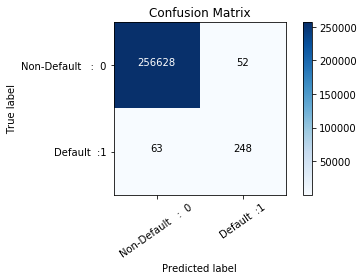

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.83      0.80      0.81       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.91      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9995525135121464


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# tunnig the model`

In [18]:
# store the predicted probabilities
# aadusting the threshold levle for probablites 

y_pred_prob = classifier.predict_proba(X_test)
print("   class : 0  class: 1  ")
print(y_pred_prob)

   class : 0  class: 1  
[[0.99895105 0.00104895]
 [0.99729576 0.00270424]
 [0.99398627 0.00601373]
 ...
 [0.99143532 0.00856468]
 [0.99598073 0.00401927]
 [0.99669264 0.00330736]]


In [19]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.60:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

Confusion Matrix, Without Normalisation
[[256635     45]
 [    63    248]]


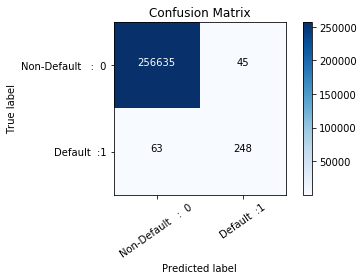

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.85      0.80      0.82       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.92      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9995797518201026


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,y_pred_class)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,y_pred_class))

acc= accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model:", acc)

In [21]:
for a in np.arange(0,1,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0] 
    print("Errors at threshold ", a, ":",total_err, " , type 2 => ", 
        cfm[1,0]," , type 1 => ", cfm[0,1])

Errors at threshold  0.0 : 256680  , type 2 =>  0  , type 1 =>  256680
Errors at threshold  0.01 : 43522  , type 2 =>  36  , type 1 =>  43486
Errors at threshold  0.02 : 9699  , type 2 =>  55  , type 1 =>  9644
Errors at threshold  0.03 : 4249  , type 2 =>  59  , type 1 =>  4190
Errors at threshold  0.04 : 2574  , type 2 =>  61  , type 1 =>  2513
Errors at threshold  0.05 : 1713  , type 2 =>  62  , type 1 =>  1651
Errors at threshold  0.06 : 1230  , type 2 =>  62  , type 1 =>  1168
Errors at threshold  0.07 : 921  , type 2 =>  62  , type 1 =>  859
Errors at threshold  0.08 : 734  , type 2 =>  62  , type 1 =>  672
Errors at threshold  0.09 : 602  , type 2 =>  62  , type 1 =>  540
Errors at threshold  0.1 : 502  , type 2 =>  62  , type 1 =>  440
Errors at threshold  0.11 : 443  , type 2 =>  62  , type 1 =>  381
Errors at threshold  0.12 : 400  , type 2 =>  63  , type 1 =>  337
Errors at threshold  0.13 : 364  , type 2 =>  63  , type 1 =>  301
Errors at threshold  0.14 : 337  , type 2 => 

# Using cross validation

In [22]:
#Using cross validation

classifier=(LogisticRegression())

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())


KFold(n_splits=10, random_state=None, shuffle=False)
[0.98636015 0.99410665 0.99727871 0.9979632  0.9966443  0.99659421
 0.99722862 0.99701159 0.99734544 0.99791308]
0.9958445945749894


Confusion Matrix, Without Normalisation
[[256628     52]
 [    63    248]]


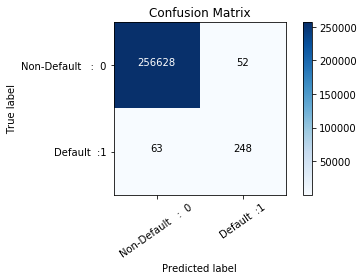

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.83      0.80      0.81       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.91      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9995525135121464


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# Decision Tree

In [25]:
# import the scale data set

x_train = pd.read_csv('x_train.csv',index_col=0)
x_test = pd.read_csv('x_test.csv',index_col=0)
y_train = pd.read_csv('y_train.csv',index_col=0)
y_test = pd.read_csv('y_test.csv',index_col=0)


# import the scale data set

x_train_scale = pd.read_csv('x_train_scale.csv',index_col=0)
x_test_scale = pd.read_csv('x_test_scale.csv',index_col=0)



In [29]:
#%%
#Running Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion = 'entropy',max_features=8,random_state=0,)
model_DecisionTree.fit(x_train_scale,y_train)

#fit the model on the data and predict the values 

y_pred = model_DecisionTree.predict(x_test_scale)


In [30]:
y_pred

array([0., 1., 1., ..., 1., 1., 1.])

Confusion Matrix, Without Normalisation
[[ 72972 183708]
 [     1    310]]


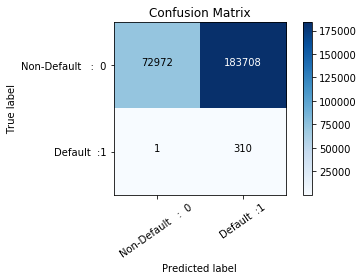

Classification report
              precision    recall  f1-score   support

         0.0       1.00      0.28      0.44    256680
         1.0       0.00      1.00      0.00       311

   micro avg       0.29      0.29      0.29    256991
   macro avg       0.50      0.64      0.22    256991
weighted avg       1.00      0.29      0.44    256991

Accuracy of the model: 0.2851539548077559


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(y_test,y_pred))

acc= accuracy_score(y_test,y_pred)
print("Accuracy of the model:", acc)

# ANN

Text(0.5, 1.0, 'Class Distribution \n (0 : Non_Default Customer    ||    1 : Default Customer)')

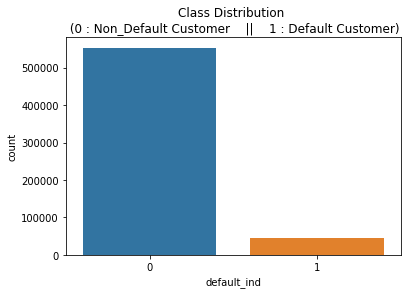

In [33]:
sns.countplot('default_ind', data=train_data)

plt.title('Class Distribution \n (0 : Non_Default Customer    ||    1 : Default Customer)')

In [34]:
nd = round(train_data['default_ind'].value_counts()[0]/len(train_data) * 100, 2)

d = round(train_data['default_ind'].value_counts()[1]/len(train_data) * 100, 2)

print('Non_Default Customer : {} % of the dataset'.format(nd))
print('Default Customer : {} % of the dataset'.format(d))

Non_Default Customer : 92.29 % of the dataset
Default Customer : 7.71 % of the dataset


In [35]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Deep Learning Model on 
# Un-Balanced Data set

In [36]:
# Importing the keras libraries and package

import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [37]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 19, kernel_initializer = 'uniform',
                     activation = 'relu', input_dim = 35))


# Adding the second hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

# dropout for second layer 
# classifier.add(Dropout(p = 0.1))

# Adding the third hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

'''# Adding the fourth hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))'''


# Adding the output layer 
classifier.add(Dense(units=1, kernel_initializer='uniform',
                     activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [38]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [39]:
# Fitting the ANN to the Training set

classifier.fit(x_train, y_train, batch_size = 100, epochs = 10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
598978/598978 [==============================] - 9s 15us/step - loss: 0.0377 - acc: 0.9923
Epoch 2/10
598978/598978 [==============================] - 9s 15us/step - loss: 0.0250 - acc: 0.9960: 1s - loss: 
Epoch 3/10
598978/598978 [==============================] - 8s 13us/step - loss: 0.0214 - acc: 0.9966
Epoch 4/10
598978/598978 [==============================] - 9s 15us/step - loss: 0.0202 - acc: 0.9967
Epoch 5/10
598978/598978 [==============================] - 9s 15us/step - loss: 0.0187 - acc: 0.9970
Epoch 6/10
598978/598978 [==============================] - 9s 15us/step - loss: 0.0188 - acc: 0.9969
Epoch 7/10
598978/598978 [==============================] - 8s 13us/step - loss: 0.0195 - acc: 0.9967
Epoch 8/10
598978/598978 [==============================] - 8s 14us/step - loss: 0.0187 - acc: 0.9970
Epoch 9/10
598978/598978 [==============================] - 8s 14us/step - loss: 0.0185 - acc: 0.9971
Epoch 10/10
598978/59

---

In [40]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)



In [41]:
y_pred

array([[0.00263461],
       [0.00263461],
       [0.00263461],
       ...,
       [0.00263463],
       [0.00263463],
       [0.00263463]], dtype=float32)

In [42]:
y_pred = (y_pred > 0.5)

In [43]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

Confusion Matrix, Without Normalisation
[[256675      5]
 [    63    248]]


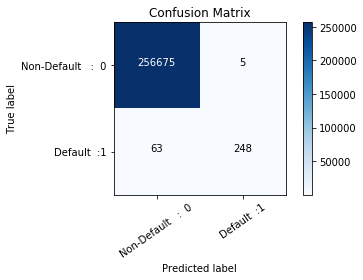

Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    256680
         1.0       0.98      0.80      0.88       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.99      0.90      0.94    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9997353992941387


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(y_test, y_pred.round())
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(y_test,y_pred))

acc= accuracy_score(y_test,y_pred)
print("Accuracy of the model:", acc)

# Deep Learning Model on 
# Balanced Data set

In [45]:
from imblearn.over_sampling import SMOTE

In [49]:
x_resample, y_resample = SMOTE().fit_sample(x_train_scale,y_train)

In [47]:
x_resample

array([[  7500.        ,   7500.        ,    800.        , ...,
           225.        , 139766.        ,  32163.        ],
       [  5000.        ,   5000.        ,   4150.        , ...,
           225.        , 139766.        ,  32163.        ],
       [  5750.        ,   5750.        ,   3675.        , ...,
           225.        , 139766.        ,  32163.        ],
       ...,
       [  5682.18269828,   5682.18269828,   5682.18269828, ...,
           379.70089009,  10269.0258666 ,   6175.24656465],
       [  8250.614798  ,   8250.614798  ,   8250.614798  , ...,
             0.        ,  16119.72849128,  16800.        ],
       [ 10303.19943022,  10303.19943022,  10053.19943022, ...,
           225.        , 139766.        ,  32163.        ]])

In [50]:
x_cols=[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim']]

y_cols = [['default_ind']]


In [51]:
x = pd.DataFrame(x_resample, columns=x_cols)
y = pd.DataFrame(y_resample, columns=y_cols)

In [52]:
data = pd.concat([x, y], axis = 1)

In [53]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,-0.844559,-0.843203,-1.640620,-0.634014,0.052412,-0.737495,1.682281,-1.698028,2.149639,-0.915633,1.286434,-0.521055,-0.414882,0.848153,-0.730864,-0.847976,-0.32479,-0.589107,-0.183001,-1.470150,-0.809528,-0.811282,-0.811236,-0.108522,-1.121129,-0.033334,-0.255238,-0.103534,-0.136873,-0.094862,-0.474069,-0.09384,0.001194,0.00479,0.02725,0.0
1,-1.144446,-1.143412,-1.238829,-0.634014,-1.393496,-1.149406,-1.365338,0.492187,-0.900245,1.339413,1.286434,0.567029,-2.185476,-0.358617,-0.730864,-1.821052,-0.32479,-0.499397,-1.532957,-0.531397,-0.809528,-0.811282,-0.811236,-0.605437,-0.710525,-0.394434,-0.924911,-0.103534,-0.136873,-0.094862,0.292991,-0.09384,0.001194,0.00479,0.02725,0.0
2,-1.054480,-1.053349,-1.295800,-0.634014,-1.393496,-1.053437,-1.365338,1.039741,-0.900245,0.898974,1.286434,-0.521055,-2.152022,-0.358617,-0.730864,-0.264131,-0.32479,-0.653977,-1.925287,-0.787420,-0.809528,-0.811282,-0.811236,-0.451285,-0.734114,-0.286104,-0.705917,-0.103534,-0.136873,-0.094862,-0.520722,-0.09384,0.001194,0.00479,0.02725,0.0
3,-1.144446,-1.143412,-1.259819,-0.634014,-1.393496,-1.149406,-1.365338,-0.055367,0.624697,-0.598518,1.286434,2.743197,-1.869520,-0.358617,1.268148,-1.431822,-0.32479,-0.666158,-1.764980,-1.555491,-0.809528,-0.811282,-0.811236,-0.553627,-0.691671,-0.394434,-0.740312,-0.103534,-0.136873,-0.094862,-0.492212,-0.09384,0.001194,0.00479,0.02725,0.0
4,-1.600275,-1.599730,-1.736569,-0.634014,-0.453198,-1.626078,0.158472,-1.698028,0.624697,-0.950869,1.286434,0.022987,-1.932711,-0.358617,1.268148,-1.626437,-0.32479,-0.733464,0.842122,-1.811515,-0.809528,-0.811282,-0.811236,-1.068736,-1.242635,-0.943307,-0.902366,-0.103534,-0.136873,-0.094862,-0.514292,-0.09384,0.001194,0.00479,0.02725,0.0


In [54]:
data.shape


(1105644, 36)

In [58]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 19, kernel_initializer = 'uniform',
                     activation = 'relu', input_dim = 35))


# Adding the second hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

# dropout for second layer 
# classifier.add(Dropout(p = 0.1))

# Adding the third hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

'''# Adding the fourth hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))'''


# Adding the output layer 
classifier.add(Dense(units=1, kernel_initializer='uniform',
                     activation='sigmoid'))

In [59]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [60]:
# Fitting the ANN to the Training set

classifier.fit(x_resample, y_resample, batch_size = 100, epochs = 10)

Epoch 1/10
1105644/1105644 [==============================] - 12s 11us/step - loss: 0.0435 - acc: 0.9885
Epoch 2/10
1105644/1105644 [==============================] - 13s 12us/step - loss: 0.0315 - acc: 0.9917
Epoch 3/10
1105644/1105644 [==============================] - 13s 12us/step - loss: 0.0295 - acc: 0.9922
Epoch 4/10
1105644/1105644 [==============================] - 14s 12us/step - loss: 0.0282 - acc: 0.9925
Epoch 5/10
1105644/1105644 [==============================] - 13s 12us/step - loss: 0.0271 - acc: 0.9927
Epoch 6/10
1105644/1105644 [==============================] - 13s 12us/step - loss: 0.0264 - acc: 0.9929
Epoch 7/10
1105644/1105644 [==============================] - 13s 12us/step - loss: 0.0258 - acc: 0.9931
Epoch 8/10
1105644/1105644 [==============================] - 13s 12us/step - loss: 0.0252 - acc: 0.9932
Epoch 9/10
1105644/1105644 [==============================] - 13s 12us/step - loss: 0.0248 - acc: 0.9933
Epoch 10/10
1105644/1105644 [==========================

In [61]:
# Predicting the Test set results
y_pred = classifier.predict(x_test_scale)



In [62]:
y_pred

array([[0.03366145],
       [0.0217652 ],
       [0.21032146],
       ...,
       [0.99997854],
       [1.        ],
       [1.        ]], dtype=float32)

In [63]:
y_pred = (y_pred > 0.5)

In [64]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

Confusion Matrix, Without Normalisation
[[106172 150508]
 [    10    301]]


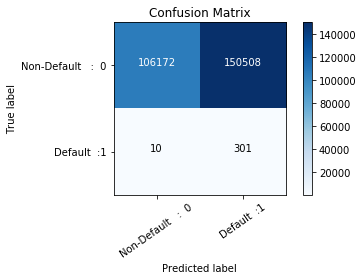

Classification report
              precision    recall  f1-score   support

         0.0       1.00      0.41      0.59    256680
         1.0       0.00      0.97      0.00       311

   micro avg       0.41      0.41      0.41    256991
   macro avg       0.50      0.69      0.29    256991
weighted avg       1.00      0.41      0.58    256991

Accuracy of the model: 0.4143063375760241


In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(y_test,y_pred))

acc= accuracy_score(y_test,y_pred)
print("Accuracy of the model:", acc)

---

# Creating another dataframe with new variables 

In [35]:
data=pd.read_csv('XYZCorp_LendingData.txt',header=0 ,
                      delimiter="\t", low_memory=False)

data.shape   #(855969, 73)


(855969, 73)

In [36]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [37]:
#Feature Selection
# Out of 73 , few variables are not helpful or impactful in order to build a predictive model, hence dropping.

data.drop(['id','member_id','funded_amnt_inv','grade','emp_title','pymnt_plan','desc','title','addr_state',
            'inq_last_6mths','mths_since_last_record','initial_list_status','mths_since_last_major_derog','policy_code',
            'dti_joint','verification_status_joint','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m'
            ,'open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m',
            'max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m'],axis=1,inplace=True)

data.shape #(855969, 41)


(855969, 41)

In [38]:
# Checking if missing values are present and datatype of each variable.
data.isnull().sum()


loan_amnt                          0
funded_amnt                        0
term                               0
int_rate                           0
installment                        0
sub_grade                          0
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
purpose                            0
zip_code                           0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
mths_since_last_delinq        439812
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                       446
total_acc                          0
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
t

In [39]:

# Imputing missing data for categorical variable with mode value

colname1=['term','sub_grade','emp_length','home_ownership','verification_status',
          'issue_d','purpose','zip_code','earliest_cr_line','last_pymnt_d',
          'next_pymnt_d','last_credit_pull_d']
for x in colname1[:]:
     data[x].fillna(data[x].mode()[0],inplace=True)
    
data.isnull().sum()

loan_amnt                          0
funded_amnt                        0
term                               0
int_rate                           0
installment                        0
sub_grade                          0
emp_length                         0
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
purpose                            0
zip_code                           0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
mths_since_last_delinq        439812
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                       446
total_acc                          0
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
t

In [40]:
# Imputing missing data for Numerical with mean value / Zeros 
data['annual_inc_joint'].fillna(0,inplace=True)

colname2=['mths_since_last_delinq','revol_util','collections_12_mths_ex_med',
          'total_rev_hi_lim']
for x in colname2[:]:
    data[x].fillna(data[x].mean(),inplace=True)
    
data.isnull().sum()
data.shape   

(855969, 41)

In [41]:
# Label Encoding - to label all categorical variable value with numeric value
#Label will get assigned in Ascending alphabetical of variable value

colname1=['term','sub_grade','emp_length','home_ownership','verification_status',
          'purpose','zip_code','earliest_cr_line','last_pymnt_d',
          'next_pymnt_d','last_credit_pull_d','application_type']

data.head()
from sklearn import preprocessing

le={}

for x in colname1:
     le[x]=preprocessing.LabelEncoder()

for x in colname1:
     data[x]=le[x].fit_transform(data[x])
data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,annual_inc_joint,acc_now_delinq,total_rev_hi_lim,default_ind
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,Dec-2011,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,0.0,32163.574526,0
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,Dec-2011,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,0.0,32163.574526,1
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,Dec-2011,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,0.0,32163.574526,0
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,Dec-2011,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,0.0,32163.574526,0
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,Dec-2011,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,0.0,32163.574526,0


In [42]:
#Train and Test split

# issue_d is object datatype to make use for split converting issue_d in Date

data.issue_d = pd.to_datetime(data.issue_d)   #%y-%m-%d
col_name = 'issue_d'
print (data[col_name].dtype)

#split data in train and test

split_date = "2015-05-01"

train = data.loc[data['issue_d'] <= split_date]
train=train.drop(['issue_d'],axis=1)
#train.head()
train.shape    #(598978, 40)

test = data.loc[data['issue_d'] > split_date]
test=test.drop(['issue_d'],axis=1)
#test.head()
test.shape  #(256991, 40)

datetime64[ns]


(256991, 40)

In [43]:
train.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,annual_inc_joint,acc_now_delinq,total_rev_hi_lim,default_ind
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,0.0,32163.574526,0
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,0.0,32163.574526,1
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,0.0,32163.574526,0
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,0.0,32163.574526,0
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,0.0,32163.574526,0


In [44]:
test.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,annual_inc_joint,acc_now_delinq,total_rev_hi_lim,default_ind
452272,25000.0,25000.0,0,5.32,752.87,0,0,1,150000.0,0,1,46,9.54,0.0,208,34.149943,7.0,0.0,19339.0,42.5,18.0,24357.97,24357.97,682.67,682.67,642.03,40.64,0.0,0.0,0.0,40,701.14,0,41,0.0,0,0.0,0.0,45500.0,0
452273,18000.0,18000.0,1,19.48,471.70,21,7,5,150000.0,0,2,850,9.39,0.0,398,34.149943,18.0,1.0,14052.0,40.7,27.0,17820.50,17820.50,286.64,286.64,179.50,107.14,0.0,0.0,0.0,40,335.34,0,41,0.0,0,0.0,0.0,34500.0,0
452274,7000.0,7000.0,0,7.49,217.72,3,1,1,59000.0,0,1,201,13.06,1.0,623,23.000000,10.0,0.0,10467.0,24.2,34.0,7000.00,7000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,40,0.00,0,41,0.0,0,0.0,0.0,43200.0,0
452275,20000.0,20000.0,0,17.97,722.75,18,7,1,180000.0,0,2,728,25.10,0.0,31,34.149943,13.0,0.0,59126.0,92.1,30.0,20000.00,20000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,40,0.00,0,41,0.0,0,0.0,0.0,64200.0,0
452276,15000.0,15000.0,0,6.99,463.09,2,2,1,93000.0,0,1,12,14.86,0.0,620,34.149943,8.0,0.0,14914.0,43.2,17.0,15000.00,15000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,40,0.00,0,41,0.0,0,0.0,0.0,34500.0,0


In [79]:
#selecting X and Y

X_train=train.values[:,:-1]
Y_train=train.values[:,-1]
Y_train=Y_train.astype(int)
print(Y_train)

X_test=test.values[:,:-1]
Y_test=test.values[:,-1]
Y_test=Y_test.astype(int)
print(Y_test)

[0 1 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


# LOGISTIC REGRESSION

In [142]:
#all reg module includes in sklearn.linear_model
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#colname=XYZ_DF_rev.columns[:]
#fitting training data to the model
classifier.fit(X_train,Y_train)
#predicting on Test data
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

Confusion Matrix, Without Normalisation
[[256641     39]
 [    63    248]]


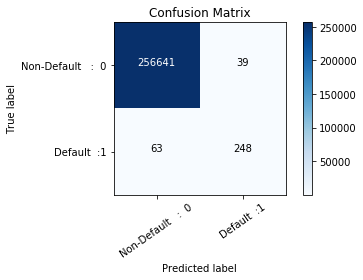

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.86      0.80      0.83       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.93      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.999603098941208


In [143]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# tunnig the model`

In [144]:
# store the predicted probabilities
# aadusting the threshold levle for probablites 

y_pred_prob = classifier.predict_proba(X_test)
print("   class : 0  class: 1  ")
print(y_pred_prob)

   class : 0  class: 1  
[[9.99094925e-01 9.05074715e-04]
 [9.98993697e-01 1.00630279e-03]
 [9.82254653e-01 1.77453465e-02]
 ...
 [9.99709960e-01 2.90039565e-04]
 [9.99643773e-01 3.56226593e-04]
 [9.99786580e-01 2.13420240e-04]]


In [145]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.60:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

Confusion Matrix, Without Normalisation
[[256647     33]
 [    63    248]]


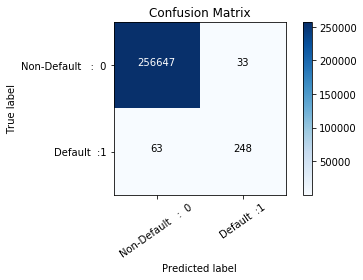

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.88      0.80      0.84       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.94      0.90      0.92    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9996264460623134


In [146]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,y_pred_class)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,y_pred_class))

acc= accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model:", acc)

In [147]:
for a in np.arange(0,1,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0] 
    print("Errors at threshold ", a, ":",total_err, " , type 2 => ", 
        cfm[1,0]," , type 1 => ", cfm[0,1])

Errors at threshold  0.0 : 256680  , type 2 =>  0  , type 1 =>  256680
Errors at threshold  0.01 : 57976  , type 2 =>  43  , type 1 =>  57933
Errors at threshold  0.02 : 20198  , type 2 =>  57  , type 1 =>  20141
Errors at threshold  0.03 : 8279  , type 2 =>  60  , type 1 =>  8219
Errors at threshold  0.04 : 3672  , type 2 =>  62  , type 1 =>  3610
Errors at threshold  0.05 : 1661  , type 2 =>  62  , type 1 =>  1599
Errors at threshold  0.06 : 829  , type 2 =>  63  , type 1 =>  766
Errors at threshold  0.07 : 470  , type 2 =>  63  , type 1 =>  407
Errors at threshold  0.08 : 283  , type 2 =>  63  , type 1 =>  220
Errors at threshold  0.09 : 204  , type 2 =>  63  , type 1 =>  141
Errors at threshold  0.1 : 170  , type 2 =>  63  , type 1 =>  107
Errors at threshold  0.11 : 156  , type 2 =>  63  , type 1 =>  93
Errors at threshold  0.12 : 149  , type 2 =>  63  , type 1 =>  86
Errors at threshold  0.13 : 143  , type 2 =>  63  , type 1 =>  80
Errors at threshold  0.14 : 139  , type 2 =>  63

# Decision_Tree_Classifier

In [88]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier()
model_DecisionTree.fit(X_train,Y_train)

#fit the model on the data and predict the values
Y_pred=model_DecisionTree.predict(X_test)



Confusion Matrix, Without Normalisation
[[250718   5962]
 [     9    302]]


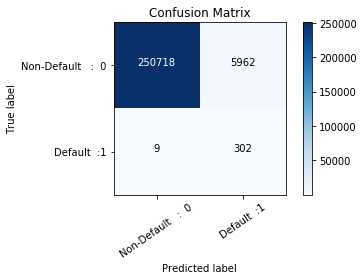

Classification report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    256680
           1       0.05      0.97      0.09       311

   micro avg       0.98      0.98      0.98    256991
   macro avg       0.52      0.97      0.54    256991
weighted avg       1.00      0.98      0.99    256991

Accuracy of the model: 0.9767657233132678


In [89]:
#checking result
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# Gradient_Boosting_Classifier

In [68]:
#predicting using the 
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=100,)


#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

Confusion Matrix, Without Normalisation
[[256625     55]
 [    10    301]]


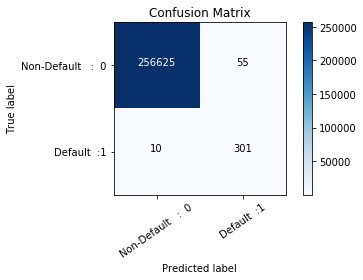

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.85      0.97      0.90       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.92      0.98      0.95    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9997470728546914


In [69]:
#checking result
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# tunnig the modelM

In [71]:
#predicting using the 
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=130,)


#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

Confusion Matrix, Without Normalisation
[[256628     52]
 [    10    301]]


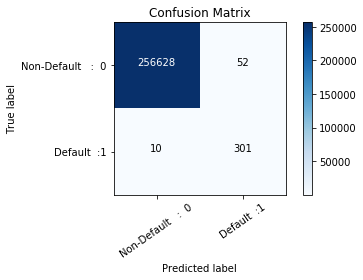

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.85      0.97      0.91       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.93      0.98      0.95    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9997587464152441


In [72]:
#checking result
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# ANN

In [112]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 19, kernel_initializer = 'uniform',
                     activation = 'relu', input_dim = 39))


# Adding the second hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

# dropout for second layer 
# classifier.add(Dropout(p = 0.1))

# Adding the third hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

'''# Adding the fourth hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))'''


# Adding the output layer 
classifier.add(Dense(units=1, kernel_initializer='uniform',
                     activation='sigmoid'))

In [113]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [114]:
# Fitting the ANN to the Training set

classifier.fit(X_train,Y_train, batch_size = 100, epochs = 10)

Epoch 1/10
598978/598978 [==============================] - 8s 14us/step - loss: 0.0324 - acc: 0.9940
Epoch 2/10
598978/598978 [==============================] - 9s 14us/step - loss: 0.0233 - acc: 0.9963
Epoch 3/10
598978/598978 [==============================] - 9s 15us/step - loss: 0.0198 - acc: 0.9969
Epoch 4/10
598978/598978 [==============================] - 8s 14us/step - loss: 0.0188 - acc: 0.9970
Epoch 5/10
598978/598978 [==============================] - 8s 14us/step - loss: 0.0177 - acc: 0.9971
Epoch 6/10
598978/598978 [==============================] - 8s 14us/step - loss: 0.0172 - acc: 0.9972
Epoch 7/10
598978/598978 [==============================] - 8s 14us/step - loss: 0.0169 - acc: 0.9972
Epoch 8/10
598978/598978 [==============================] - 8s 14us/step - loss: 0.0165 - acc: 0.9973
Epoch 9/10
598978/598978 [==============================] - 9s 15us/step - loss: 0.0166 - acc: 0.9973
Epoch 10/10
598978/598978 [==============================] - 9s 16us/step - loss: 

---

In [115]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)



In [116]:
Y_pred

array([[0.00926942],
       [0.00671706],
       [0.00603488],
       ...,
       [0.00713921],
       [0.00606315],
       [0.00426842]], dtype=float32)

In [117]:
Y_pred = (Y_pred > 0.5)

In [118]:
Y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

Confusion Matrix, Without Normalisation
[[256675      5]
 [    63    248]]


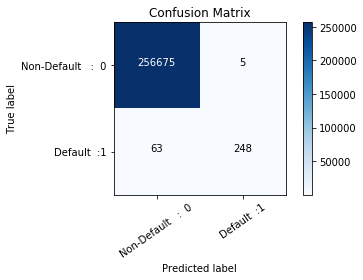

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.98      0.80      0.88       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.99      0.90      0.94    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9997353992941387


In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# Deep Learning Model on 
# Balanced Data set

In [45]:
from imblearn.over_sampling import SMOTE

In [121]:
x_resample, y_resample = SMOTE().fit_sample(X_train,Y_train)

In [122]:
x_resample

array([[5.00000000e+03, 5.00000000e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.21635745e+04],
       [2.50000000e+03, 2.50000000e+03, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.21635745e+04],
       [2.40000000e+03, 2.40000000e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.21635745e+04],
       ...,
       [5.63087286e+03, 5.63087286e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.59462999e+03],
       [2.91922202e+04, 2.91922202e+04, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.58383304e+04],
       [1.84391859e+04, 1.84391859e+04, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.25902035e+04]])

In [123]:
x_cols=[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim']]

y_cols = [['default_ind']]


In [126]:
x = pd.DataFrame(x_resample)
y = pd.DataFrame(y_resample)

In [127]:
data = pd.concat([x, y], axis = 1)

In [128]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,0
0,5000.0,5000.0,0.0,10.65,162.87,6.0,1.0,5.0,24000.0,2.0,1.0,805.0,27.65,0.0,263.0,34.149943,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39.0,171.62,0.0,41.0,0.0,0.0,0.0,0.0,32163.574526,0
1,2500.0,2500.0,1.0,15.27,59.83,13.0,10.0,5.0,30000.0,1.0,0.0,295.0,1.00,0.0,41.0,34.149943,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5.0,119.66,0.0,99.0,0.0,0.0,0.0,0.0,32163.574526,1
2,2400.0,2400.0,0.0,15.96,84.33,14.0,1.0,5.0,12252.0,0.0,11.0,568.0,8.72,0.0,570.0,34.149943,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55.0,649.91,0.0,41.0,0.0,0.0,0.0,0.0,32163.574526,0
3,10000.0,10000.0,0.0,13.49,339.31,10.0,1.0,5.0,49200.0,1.0,9.0,851.0,20.00,0.0,208.0,35.000000,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39.0,357.48,0.0,40.0,0.0,0.0,0.0,0.0,32163.574526,0
4,3000.0,3000.0,1.0,12.69,67.79,9.0,0.0,5.0,80000.0,1.0,9.0,904.0,17.94,0.0,274.0,38.000000,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40.0,67.79,0.0,41.0,0.0,0.0,0.0,0.0,32163.574526,0


In [129]:
data.shape


(1105644, 40)

In [133]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 19, kernel_initializer = 'uniform',
                     activation = 'relu', input_dim = 39))


# Adding the second hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

# dropout for second layer 
# classifier.add(Dropout(p = 0.1))

# Adding the third hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

'''# Adding the fourth hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))'''


# Adding the output layer 
classifier.add(Dense(units=1, kernel_initializer='uniform',
                     activation='sigmoid'))

In [134]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [135]:
# Fitting the ANN to the Training set

classifier.fit(x_resample, y_resample, batch_size = 100, epochs = 10)

Epoch 1/10
1105644/1105644 [==============================] - 14s 13us/step - loss: 0.0615 - acc: 0.9848
Epoch 2/10
1105644/1105644 [==============================] - 14s 13us/step - loss: 0.0503 - acc: 0.9877
Epoch 3/10
1105644/1105644 [==============================] - 15s 13us/step - loss: 0.0489 - acc: 0.9879
Epoch 4/10
1105644/1105644 [==============================] - 15s 14us/step - loss: 0.0474 - acc: 0.9882
Epoch 5/10
1105644/1105644 [==============================] - 15s 13us/step - loss: 0.0462 - acc: 0.9883
Epoch 6/10
1105644/1105644 [==============================] - 15s 13us/step - loss: 0.0447 - acc: 0.9886
Epoch 7/10
1105644/1105644 [==============================] - 15s 13us/step - loss: 0.0444 - acc: 0.9888
Epoch 8/10
1105644/1105644 [==============================] - 15s 14us/step - loss: 0.0467 - acc: 0.9887
Epoch 9/10
1105644/1105644 [==============================] - 16s 14us/step - loss: 0.0440 - acc: 0.9891
Epoch 10/10
1105644/1105644 [==========================

In [137]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)



In [138]:
y_pred

array([[0.99630415],
       [0.89811   ],
       [0.41584623],
       ...,
       [0.03159442],
       [0.01116269],
       [0.00743752]], dtype=float32)

In [139]:
y_pred = (y_pred > 0.5)

In [140]:
y_pred

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

Confusion Matrix, Without Normalisation
[[134973 121707]
 [    98    213]]


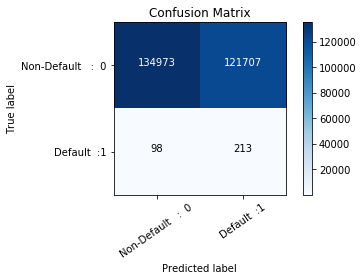

Classification report
              precision    recall  f1-score   support

         0.0       1.00      0.53      0.69    256680
         1.0       0.00      0.68      0.00       311

   micro avg       0.53      0.53      0.53    256991
   macro avg       0.50      0.61      0.35    256991
weighted avg       1.00      0.53      0.69    256991

Accuracy of the model: 0.5260339856259558


In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(y_test,y_pred))

acc= accuracy_score(y_test,y_pred)
print("Accuracy of the model:", acc)

# FINAL MODEL 

# Gradient Boosting Classifier

In [73]:
data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,annual_inc_joint,acc_now_delinq,total_rev_hi_lim,default_ind
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,2011-12-01,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,0.0,32163.574526,0
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,2011-12-01,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,0.0,32163.574526,1
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,2011-12-01,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,0.0,32163.574526,0
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,2011-12-01,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,0.0,32163.574526,0
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,2011-12-01,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,0.0,32163.574526,0


In [74]:
data = data.drop('issue_d', axis=1)

In [75]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [76]:
x.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,annual_inc_joint,acc_now_delinq,total_rev_hi_lim
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,0.0,32163.574526
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,0.0,32163.574526
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,0.0,32163.574526
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,0.0,32163.574526
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,0.0,32163.574526


In [82]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: default_ind, dtype: int64

In [50]:
#predicting using the 
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=130,)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)



GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

# Prediction on Full data set 

In [84]:
Y_full_pred=model_GradientBoosting.predict(x)

In [86]:
Y_full_pred

array([0, 1, 0, ..., 0, 0, 0])

In [87]:
x.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,annual_inc_joint,acc_now_delinq,total_rev_hi_lim
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,0.0,32163.574526
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,0.0,32163.574526
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,0.0,32163.574526
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,0.0,32163.574526
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,0.0,32163.574526


In [88]:
final_df = pd.DataFrame()

In [89]:
final_df = pd.concat([x,y],axis=1)

In [90]:
final_df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,annual_inc_joint,acc_now_delinq,total_rev_hi_lim,default_ind
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,0.0,32163.574526,0
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,0.0,32163.574526,1
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,0.0,32163.574526,0
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,0.0,32163.574526,0
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,0.0,32163.574526,0


In [91]:
final_df['Predicted_class']=Y_full_pred

In [94]:
final_df.shape

(855969, 41)

In [92]:
final_df.head(10)

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,annual_inc_joint,acc_now_delinq,total_rev_hi_lim,default_ind,Predicted_class
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,0.0,32163.574526,0,0
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,0.0,32163.574526,1,1
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,0.0,32163.574526,0,0
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,0.0,32163.574526,0,0
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,0.0,32163.574526,0,0
5,5000.0,5000.0,0,7.90,156.46,3,3,5,36000.0,1,13,798,11.20,0.0,573,34.149943,9.0,0.0,7963.0,28.3,12.0,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,39,161.03,0,101,0.0,0,0.0,0.0,32163.574526,0,0
6,7000.0,7000.0,1,15.96,170.08,14,8,5,47004.0,0,2,266,23.51,0.0,340,34.149943,7.0,0.0,17726.0,85.6,11.0,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.00,40,170.08,0,41,0.0,0,0.0,0.0,32163.574526,0,0
7,3000.0,3000.0,0,18.64,109.43,20,9,5,48000.0,1,0,834,5.35,0.0,285,34.149943,4.0,0.0,8221.0,87.5,4.0,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.00,39,111.34,0,23,0.0,0,0.0,0.0,32163.574526,0,0
8,5600.0,5600.0,1,21.28,152.39,26,4,4,40000.0,1,11,892,5.55,0.0,46,34.149943,11.0,0.0,5210.0,32.6,13.0,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,4,152.39,0,12,0.0,0,0.0,0.0,32163.574526,1,1
9,5375.0,5375.0,1,12.69,121.45,9,10,5,15000.0,2,9,724,18.08,0.0,688,34.149943,2.0,0.0,9279.0,36.5,3.0,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,77,121.45,0,65,0.0,0,0.0,0.0,32163.574526,1,1


## Export the final data-frame to Root Directory

In [93]:
final_df.to_csv('final_data_with_prediction.csv')

                                            # THE END 